
[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\Drakn\OneDrive\Desktop\EPU NTUA\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


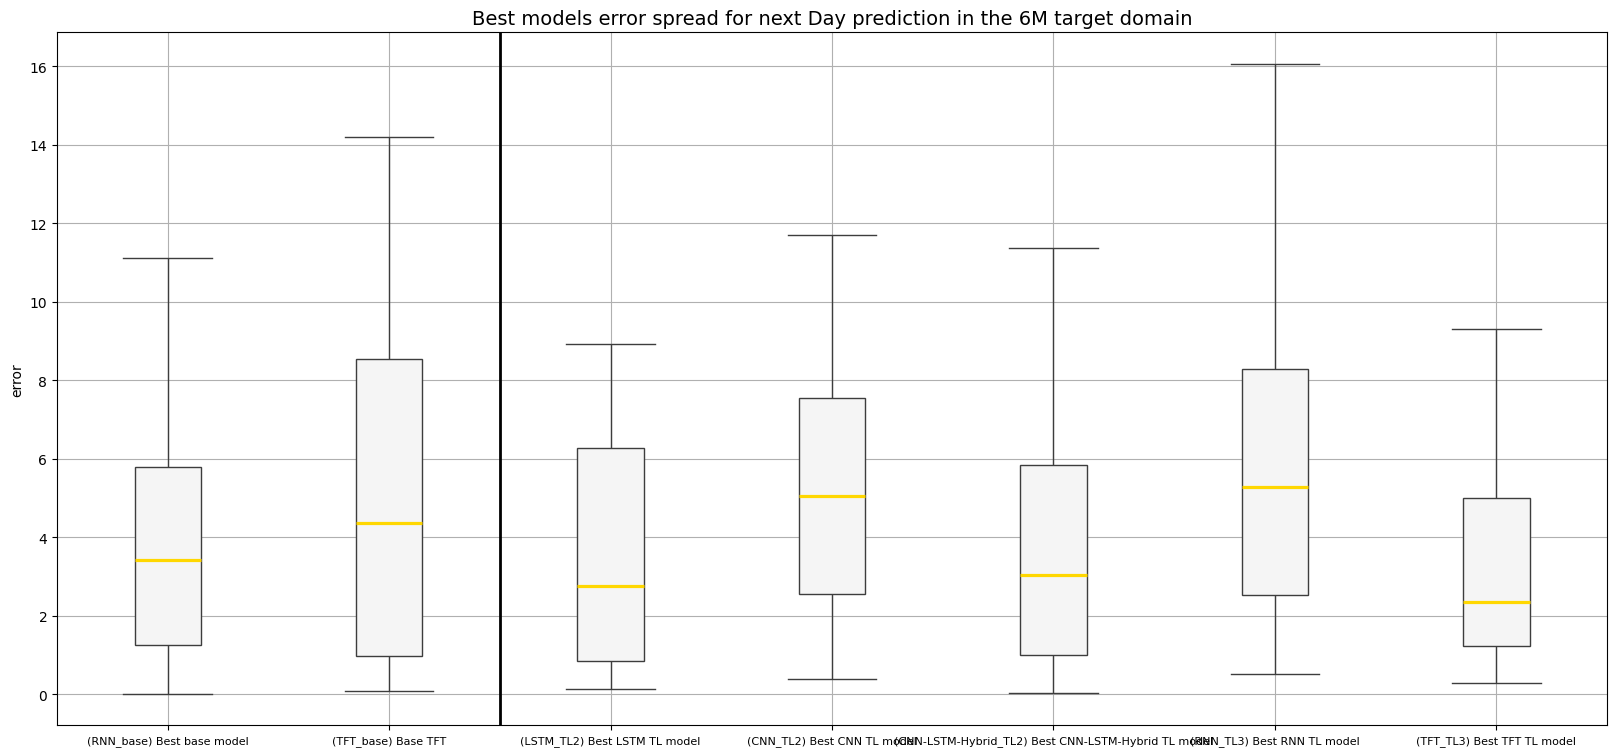

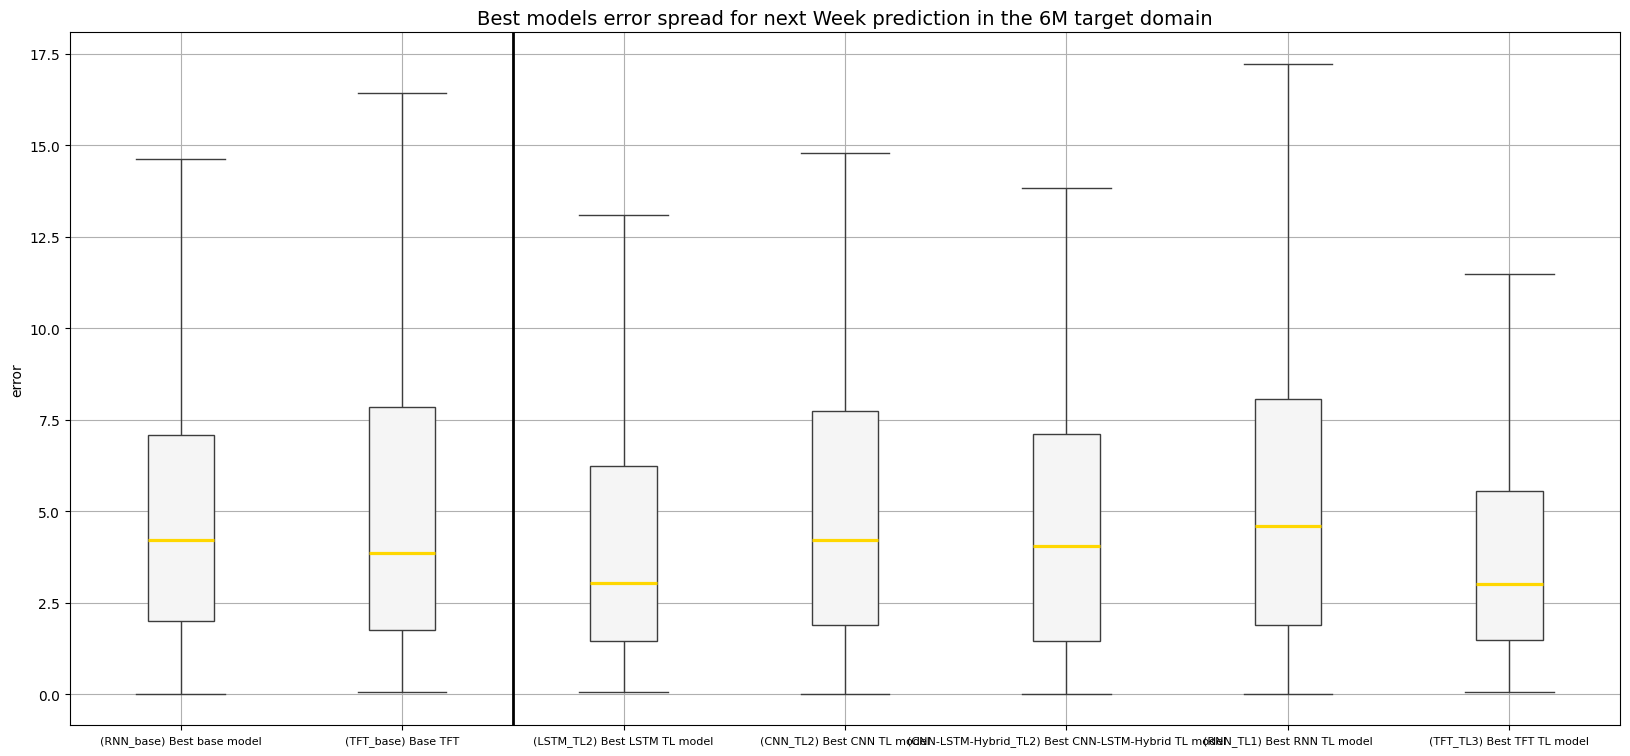

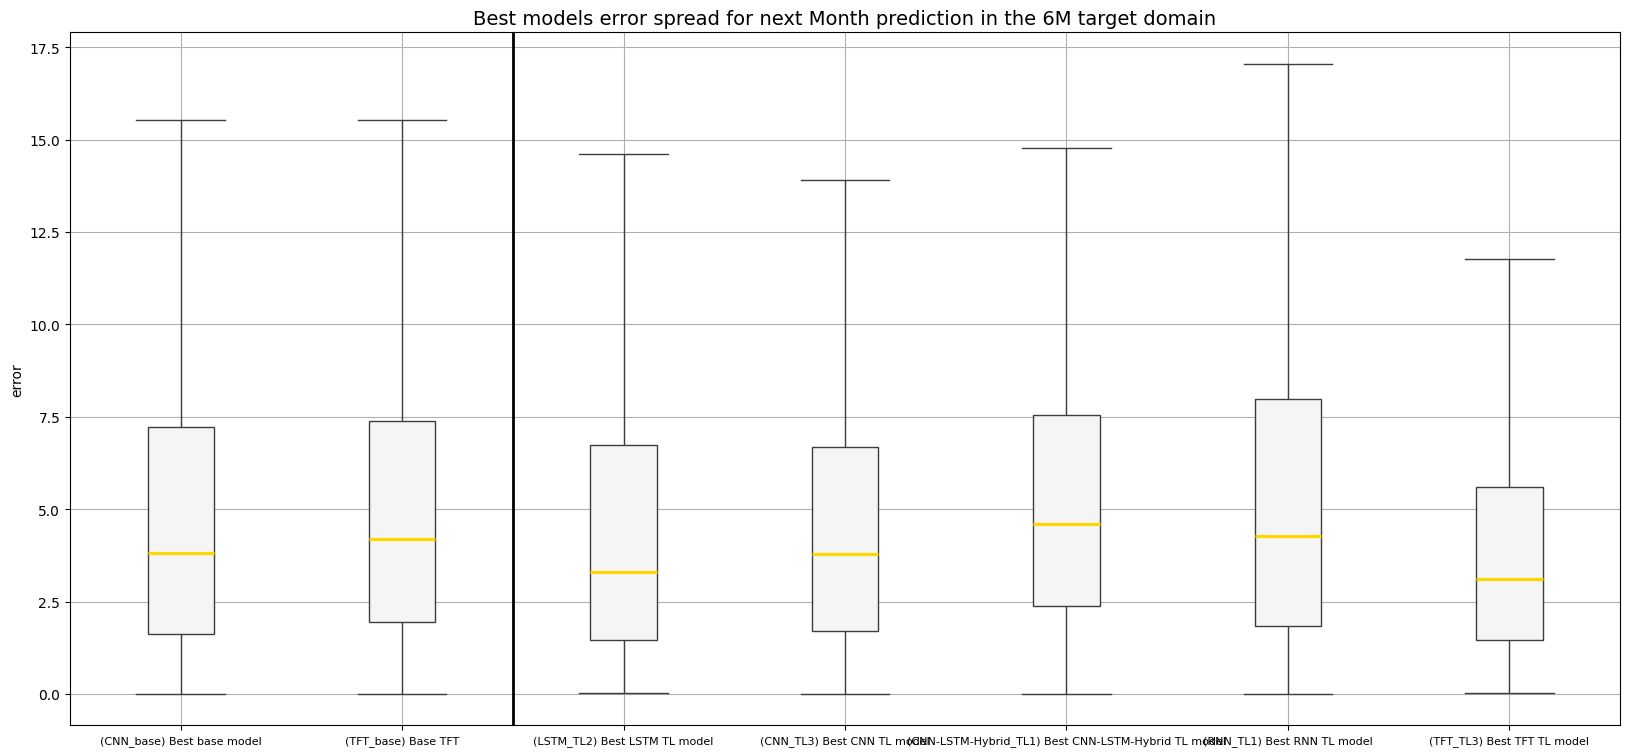

"\nFSI_results('target', '6M')\n"

In [ ]:
!pip install scikit-learn==1.3.2
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import joblib
import pickle
import json



def error_ranges(domain, dataset):

    periods = [24, 7*24, 30*24]
    time_periods = ['Day', 'Week', 'Month']

    for period,time_period in zip(periods, time_periods):

        if domain == 'target':

            true_measurements_unscaled = (scaler_target.inverse_transform(y_test_target))*(sqm_target/100)
            true_measurements_unscaled = true_measurements_unscaled[:-24]


            CNN_RMSE_values, CNN_LSTM_Hybrid_RMSE_values, LSTM_RMSE_values, RNN_RMSE_values, TFT_RMSE_values = make_metric_lists(time_period, dataset, 'RMSE')

            #Best BASE model selection

            if dataset == '12M':
                base_models_target = [LSTM_RMSE_values[1], CNN_RMSE_values[1], CNN_LSTM_Hybrid_RMSE_values[1], RNN_RMSE_values[1]]
            if dataset == '6M':
                base_models_target = [LSTM_RMSE_values[0], CNN_RMSE_values[0], CNN_LSTM_Hybrid_RMSE_values[0], RNN_RMSE_values[0]]

            model_index = base_models_target.index(min(base_models_target))

            if model_index == 0:
                predictions_BASE = LSTM_predictions_base_target
                model_BASE = 'LSTM_base'
            elif model_index == 1:
                predictions_BASE = CNN_predictions_base_target
                model_BASE = 'CNN_base'
            elif model_index == 2:
                predictions_BASE = CNN_LSTM_Hybrid_predictions_base_target
                model_BASE = 'CNN_LSTM_Hybrid_base'
            elif model_index == 3:
                predictions_BASE = RNN_predictions_base_target
                model_BASE = 'RNN_base'

            predictions_BASE_TFT = TFT_predictions_base_target.reshape(-1,1)
            model_BASE_TFT = 'TFT_base'


            #Best LSTM TL model selection

            if dataset == '12M':
                models = [LSTM_RMSE_values[3], LSTM_RMSE_values[5], LSTM_RMSE_values[7]]
            elif dataset == '6M':
                models = [LSTM_RMSE_values[1], LSTM_RMSE_values[2], LSTM_RMSE_values[3]]

            model_index = models.index(min(models))

            if model_index == 0:
                predictions_LSTM = LSTM_predictions_TL1_target
                model_LSTM = 'LSTM_TL1'
            elif model_index == 1:
                predictions_LSTM = LSTM_predictions_TL2_target
                model_LSTM = 'LSTM_TL2'
            elif model_index == 2:
                predictions_LSTM = LSTM_predictions_TL3_target
                model_LSTM = 'LSTM_TL3'

            #Best CNN TL model selection

            if dataset == '12M':
                models = [CNN_RMSE_values[3], CNN_RMSE_values[5], CNN_RMSE_values[7]]
            elif dataset == '6M':
                models = [CNN_RMSE_values[1], CNN_RMSE_values[2], CNN_RMSE_values[3]]

            model_index = models.index(min(models))

            if model_index == 0:
                predictions_CNN = CNN_predictions_TL1_target
                model_CNN = 'CNN_TL1'
            elif model_index == 1:
                predictions_CNN = CNN_predictions_TL2_target
                model_CNN = 'CNN_TL2'
            elif model_index == 2:
                predictions_CNN = CNN_predictions_TL3_target
                model_CNN = 'CNN_TL3'


            #Best CNN-LSTM-Hybrid TL model selection

            if dataset == '12M':
                models = [CNN_LSTM_Hybrid_RMSE_values[3], CNN_LSTM_Hybrid_RMSE_values[5], CNN_LSTM_Hybrid_RMSE_values[7], CNN_LSTM_Hybrid_RMSE_values[9], CNN_LSTM_Hybrid_RMSE_values[11]]
            if dataset == '6M':
                models = [CNN_LSTM_Hybrid_RMSE_values[1], CNN_LSTM_Hybrid_RMSE_values[2], CNN_LSTM_Hybrid_RMSE_values[3], CNN_LSTM_Hybrid_RMSE_values[4], CNN_LSTM_Hybrid_RMSE_values[5]]

            model_index = models.index(min(models))

            if model_index == 0:
                predictions_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_predictions_TL1_target
                model_CNN_LSTM_Hybrid = 'CNN-LSTM-Hybrid_TL1'
            elif model_index == 1:
                predictions_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_predictions_TL2_target
                model_CNN_LSTM_Hybrid = 'CNN-LSTM-Hybrid_TL2'
            elif model_index == 2:
                predictions_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_predictions_TL3_target
                model_CNN_LSTM_Hybrid = 'CNN-LSTM-Hybrid_TL3'
            elif model_index == 3:
                predictions_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_predictions_TL4_target
                model_CNN_LSTM_Hybrid = 'CNN-LSTM-Hybrid_TL4'
            elif model_index == 4:
                predictions_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_predictions_TL5_target
                model_CNN_LSTM_Hybrid = 'CNN-LSTM-Hybrid_TL5'

            #Best RNN TL model selection

            if dataset == '12M':
                models = [RNN_RMSE_values[3], RNN_RMSE_values[5], RNN_RMSE_values[7]]
            if dataset == '6M':
                models = [RNN_RMSE_values[1], RNN_RMSE_values[2], RNN_RMSE_values[3]]

            model_index = models.index(min(models))

            if model_index == 0:
                predictions_RNN = RNN_predictions_TL1_target
                model_RNN = 'RNN_TL1'
            elif model_index == 1:
                predictions_RNN = RNN_predictions_TL2_target
                model_RNN = 'RNN_TL2'
            elif model_index == 2:
                predictions_RNN = RNN_predictions_TL3_target
                model_RNN = 'RNN_TL3'


            #Best TFT model selection

            if dataset == '12M':
                models = [TFT_RMSE_values[3], TFT_RMSE_values[5], TFT_RMSE_values[7], TFT_RMSE_values[9]]
            if dataset == '6M':
                models = [TFT_RMSE_values[1], TFT_RMSE_values[2], TFT_RMSE_values[3], TFT_RMSE_values[4]]

            model_index = models.index(min(models))

            if model_index == 0:
                predictions_TFT = TFT_predictions_TL1_target.reshape(-1,1)
                model_TFT = 'TFT_TL1'
            elif model_index == 1:
                predictions_TFT = TFT_predictions_TL2_target.reshape(-1,1)
                model_TFT = 'TFT_TL2'
            elif model_index == 2:
                predictions_TFT = TFT_predictions_TL3_target.reshape(-1,1)
                model_TFT = 'TFT_TL3'
            elif model_index == 3:
                predictions_TFT = TFT_predictions_TL4_target.reshape(-1,1)
                model_TFT = 'TFT_TL4'


        elif domain == 'target_2':

            true_measurements_unscaled = (scaler_target_2.inverse_transform(y_test_target_2))*(sqm_target_2/100)
            true_measurements_unscaled = true_measurements_unscaled[:-24]

            CNN_RMSE_values, CNN_LSTM_Hybrid_RMSE_values, LSTM_RMSE_values, RNN_RMSE_values, TFT_RMSE_values = make_metric_lists(time_period, dataset, 'RMSE')

            #Best BASE model selection

            models = [LSTM_RMSE_values[2], CNN_RMSE_values[2], CNN_LSTM_Hybrid_RMSE_values[2], RNN_RMSE_values[2]]

            model_index = models.index(min(models))

            if model_index == 0:
                predictions_BASE = LSTM_predictions_base_target_2
                model_BASE = 'LSTM_base'
            elif model_index == 1:
                predictions_BASE = CNN_predictions_base_target_2
                model_BASE = 'CNN_base'
            elif model_index == 2:
                predictions_BASE = CNN_LSTM_Hybrid_predictions_base_target_2
                model_BASE = 'CNN_LSTM_Hybrid_base'
            elif model_index == 3:
                predictions_BASE = RNN_predictions_base_target_2
                model_BASE = 'RNN_base'
            
            predictions_BASE_TFT = TFT_predictions_base_target_2.reshape(-1,1)
            model_BASE_TFT = 'TFT_base'


            #Best LSTM TL model selection

            models = [LSTM_RMSE_values[4], LSTM_RMSE_values[6], LSTM_RMSE_values[8]]

            model_index = models.index(min(models))

            if model_index == 0:
                predictions_LSTM = LSTM_predictions_TL1_target_2
                model_LSTM = 'LSTM_TL1'
            elif model_index == 1:
                predictions_LSTM = LSTM_predictions_TL2_target_2
                model_LSTM = 'LSTM_TL2'
            elif model_index == 2:
                predictions_LSTM = LSTM_predictions_TL3_target_2
                model_LSTM = 'LSTM_TL3'

            #Best CNN TL model selection

            models = [CNN_RMSE_values[4], CNN_RMSE_values[6], CNN_RMSE_values[8]]

            model_index = models.index(min(models))

            if model_index == 0:
                predictions_CNN = CNN_predictions_TL1_target_2
                model_CNN = 'CNN_TL1'
            elif model_index == 1:
                predictions_CNN = CNN_predictions_TL2_target_2
                model_CNN = 'CNN_TL2'
            elif model_index == 2:
                predictions_CNN = CNN_predictions_TL3_target_2
                model_CNN = 'CNN_TL3'


            #Best CNN-LSTM-Hybrid TL model selection

            models = [CNN_LSTM_Hybrid_RMSE_values[4], CNN_LSTM_Hybrid_RMSE_values[6], CNN_LSTM_Hybrid_RMSE_values[8], CNN_LSTM_Hybrid_RMSE_values[10], CNN_LSTM_Hybrid_RMSE_values[12]]

            model_index = models.index(min(models))

            if model_index == 0:
                predictions_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_predictions_TL1_target_2
                model_CNN_LSTM_Hybrid = 'CNN-LSTM-Hybrid_TL1'
            elif model_index == 1:
                predictions_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_predictions_TL2_target_2
                model_CNN_LSTM_Hybrid = 'CNN-LSTM-Hybrid_TL2'
            elif model_index == 2:
                predictions_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_predictions_TL3_target_2
                model_CNN_LSTM_Hybrid = 'CNN-LSTM-Hybrid_TL3'
            elif model_index == 3:
                predictions_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_predictions_TL4_target_2
                model_CNN_LSTM_Hybrid = 'CNN-LSTM-Hybrid_TL4'
            elif model_index == 4:
                predictions_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_predictions_TL5_target_2
                model_CNN_LSTM_Hybrid = 'CNN-LSTM-Hybrid_TL5'

            #Best RNN TL model selection

            models = [RNN_RMSE_values[4], RNN_RMSE_values[6], RNN_RMSE_values[8]]

            model_index = models.index(min(models))

            if model_index == 0:
                predictions_RNN = RNN_predictions_TL1_target_2
                model_RNN = 'RNN_TL1'
            elif model_index == 1:
                predictions_RNN = RNN_predictions_TL2_target_2
                model_RNN = 'RNN_TL2'
            elif model_index == 2:
                predictions_RNN = RNN_predictions_TL3_target_2
                model_RNN = 'RNN_TL3'


            #Best TFT model selection

            models = [TFT_RMSE_values[4], TFT_RMSE_values[6], TFT_RMSE_values[8], TFT_RMSE_values[10]]

            model_index = models.index(min(models))

            if model_index == 0:
                predictions_TFT = TFT_predictions_TL1_target_2.reshape(-1,1)
                model_TFT = 'TFT_TL1'
            elif model_index == 1:
                predictions_TFT = TFT_predictions_TL2_target_2.reshape(-1,1)
                model_TFT = 'TFT_TL2'
            elif model_index == 2:
                predictions_TFT = TFT_predictions_TL3_target_2.reshape(-1,1)
                model_TFT = 'TFT_TL3'
            elif model_index == 3:
                predictions_TFT = TFT_predictions_TL4_target_2.reshape(-1,1)
                model_TFT = 'TFT_TL4'


        base_errors = np.abs(predictions_BASE[:period] - true_measurements_unscaled[:period])
        base_errors = base_errors.ravel()


        base_TFT_errors = np.abs(predictions_BASE_TFT[:period] - true_measurements_unscaled[:period])
        base_TFT_errors = base_TFT_errors.ravel()


        LSTM_errors = np.abs(predictions_LSTM[:period] - true_measurements_unscaled[:period])
        LSTM_errors = LSTM_errors.ravel()


        CNN_errors = np.abs(predictions_CNN[:period] - true_measurements_unscaled[:period])
        CNN_errors = CNN_errors.ravel()


        CNN_LSTM_Hybrid_errors = np.abs(predictions_CNN_LSTM_Hybrid[:period] - true_measurements_unscaled[:period])
        CNN_LSTM_Hybrid_errors = CNN_LSTM_Hybrid_errors.ravel()

        RNN_errors = np.abs(predictions_RNN[:period] - true_measurements_unscaled[:period])
        RNN_errors = RNN_errors.ravel()


        TFT_errors = np.abs(predictions_TFT[:period] - true_measurements_unscaled[:period])
        TFT_errors = TFT_errors.ravel()


        error_data = {
            '('+model_BASE+') Best base model': base_errors,
            '('+model_BASE_TFT+') Base TFT': base_TFT_errors,
            '('+model_LSTM+') Best LSTM TL model': LSTM_errors,
            '('+model_CNN+') Best CNN TL model': CNN_errors,
            '('+model_CNN_LSTM_Hybrid+') Best Hybrid TL model': CNN_LSTM_Hybrid_errors,
            '('+model_RNN+') Best RNN TL model': RNN_errors,
            '('+model_TFT+') Best TFT TL model': TFT_errors
        }

        # Create the boxplot without fill colors
        plt.figure(figsize=(20, 9))
        boxplot = sns.boxplot(data=list(error_data.values()), showfliers=False, widths=0.3, color='whitesmoke')

        # Customize x-ticks
        plt.xticks(ticks=np.arange(len(error_data.keys())), labels=error_data.keys(), fontsize=8)

        medians = []
        medians.append(boxplot.lines[4])
        medians.append(boxplot.lines[9])
        medians.append(boxplot.lines[14])
        medians.append(boxplot.lines[19])
        medians.append(boxplot.lines[24])
        medians.append(boxplot.lines[29])
        medians.append(boxplot.lines[34])

        # Customize median line to be orange and thicker
        for median in medians:  # The first 4 lines are whiskers, the next 4 are medians
            median.set_color('gold')
            median.set_linewidth(2.3)  # Thicker median line

        plt.axvline(x=1.5, color='black', linestyle='-', linewidth=2)

        # Add title and labels
        plt.title("Best models error spread for next {} prediction in the {} {} domain".format(time_period, dataset, domain), fontsize=14)
        plt.ylabel("error")

        plt.grid()

        # Save plot
        plt.savefig('Results/Cross Model Results/{}/Next {} Results/Error Range Results/Best_error_ranges_{}.png'.format(dataset, time_period, domain), dpi=500)

        # Show the plot
        plt.show()



def FSI_calc(model_metric, reference_metric):

    fsi = 1 - (model_metric/reference_metric)

    return fsi



def FSI_results(domain, dataset):


    time_periods = ['Day', 'Week', 'Month']

    for time_period in time_periods:

        CNN_RMSE_values, CNN_LSTM_Hybrid_RMSE_values, LSTM_RMSE_values, RNN_RMSE_values, TFT_RMSE_values, Naive_RMSE_values = make_metric_lists(time_period, dataset, 'RMSE')

        all_models = pd.DataFrame({'Model Name': [], 'RMSE': []})

        if domain == 'target':

            if dataset == '12M':

                for i in range(1,12,2):
                    if i < 2:
                        all_models.loc[len(all_models)] = ['Naive_{}'.format(model_indices[i]), Naive_RMSE_values[i]]
                    if i < 8:
                        all_models.loc[len(all_models)] = ['LSTM_{}'.format(model_indices[i]), LSTM_RMSE_values[i]]
                        all_models.loc[len(all_models)] = ['CNN_{}'.format(model_indices[i]), CNN_RMSE_values[i]]
                        all_models.loc[len(all_models)] = ['RNN_{}'.format(model_indices[i]), RNN_RMSE_values[i]]
                    if i < 10:
                        all_models.loc[len(all_models)] = ['TFT_{}'.format(model_indices[i]), TFT_RMSE_values[i]]

                    all_models.loc[len(all_models)] = ['CNN_LSTM_Hybrid_{}'.format(model_indices[i]), CNN_LSTM_Hybrid_RMSE_values[i]]

                all_models = all_models.sort_values(by='RMSE', ascending=True)

            if dataset == '6M':

                for i in range(0,6,1):
                    if i < 1:
                        all_models.loc[len(all_models)] = ['Naive_{}'.format(model_indices_6M[i]), Naive_RMSE_values[i]]
                    if i < 4:
                        all_models.loc[len(all_models)] = ['LSTM_{}'.format(model_indices_6M[i]), LSTM_RMSE_values[i]]
                        all_models.loc[len(all_models)] = ['CNN_{}'.format(model_indices_6M[i]), CNN_RMSE_values[i]]
                        all_models.loc[len(all_models)] = ['RNN_{}'.format(model_indices_6M[i]), RNN_RMSE_values[i]]
                    if i < 5:
                        all_models.loc[len(all_models)] = ['TFT_{}'.format(model_indices_6M[i]), TFT_RMSE_values[i]]

                    all_models.loc[len(all_models)] = ['CNN_LSTM_Hybrid_{}'.format(model_indices_6M[i]), CNN_LSTM_Hybrid_RMSE_values[i]]

                all_models = all_models.sort_values(by='RMSE', ascending=True)


        elif domain == 'target_2':

            for i in range(2,13,2):
                if i < 3:
                    all_models.loc[len(all_models)] = ['Naive_{}'.format(model_indices[i]), Naive_RMSE_values[i]]
                if i < 9:
                    all_models.loc[len(all_models)] = ['LSTM_{}'.format(model_indices[i]), LSTM_RMSE_values[i]]
                    all_models.loc[len(all_models)] = ['CNN_{}'.format(model_indices[i]), CNN_RMSE_values[i]]
                    all_models.loc[len(all_models)] = ['RNN_{}'.format(model_indices[i]), RNN_RMSE_values[i]]
                if i < 11:
                    all_models.loc[len(all_models)] = ['TFT_{}'.format(model_indices[i]), TFT_RMSE_values[i]]

                all_models.loc[len(all_models)] = ['CNN_LSTM_Hybrid_{}'.format(model_indices[i]), CNN_LSTM_Hybrid_RMSE_values[i]]

            all_models = all_models.sort_values(by='RMSE', ascending=True)


        fsi_values = []
        best_model = all_models.iloc[0, 0]

        fsi_values.append(FSI_calc(all_models.iloc[0, 1],all_models.iloc[1, 1]))
        fsi_1_model = all_models.iloc[1, 0]

        fsi_values.append(FSI_calc(all_models.iloc[0, 1],all_models.iloc[2, 1]))
        fsi_2_model = all_models.iloc[2, 0]

        fsi_values.append(FSI_calc(all_models.iloc[0, 1],all_models.iloc[3, 1]))
        fsi_3_model = all_models.iloc[3, 0]

        fsi_values.append(FSI_calc(all_models.iloc[0, 1],all_models.iloc[4, 1]))
        fsi_4_model = all_models.iloc[4, 0]

        fsi_values.append(FSI_calc(all_models.iloc[0, 1],all_models.iloc[5, 1]))
        fsi_5_model = all_models.iloc[5, 0]


        model_names = [fsi_1_model, fsi_2_model, fsi_3_model, fsi_4_model, fsi_5_model]

        plt.figure(figsize=(20, 9))
        plt.bar(model_names, fsi_values, width=0.5)
        plt.xlabel('Compared Model')
        plt.ylabel('FSI')
        plt.title('FSI of {} compared to next 5 best models for next {} predictions in the {} {} domain'.format(best_model, time_period, dataset, domain))
        plt.tight_layout()  # Adjust layout to make room for rotated labels
        plt.xticks(fontsize = 10)

        # Save plot
        plt.savefig('Results/Cross Model Results/{}/Next {} Results/FSI Results/FSI_{}.png'.format(dataset, time_period, domain), dpi=500)

        plt.show()



def cross_model_comparative_best_metrics_results(domain, dataset):

    if domain == 'source':

        LSTM_model_indices = [0]
        CNN_model_indices = [0]
        CNN_LSTM_Hybrid_model_indices = [0]
        RNN_model_indices = [0]
        TFT_model_indices = [0]
        Naive_model_indices = [0]


        model_names = ['LSTM_base_source', 'CNN_base_source', 'CNN_LSTM_Hybrid_base_source', 'RNN_base_source', 'TFT_base_source', 'Naive_base_source']

        range = [0,4,8]
        time_periods = ['Day', 'Week', 'Month']

        for i,time_period in zip(range,time_periods):

            metrics_df = pd.DataFrame({
            'Model': model_names,
            'RMSE': [LSTM_metrics_base_source[i+0], CNN_metrics_base_source[i+0], CNN_LSTM_Hybrid_metrics_base_source[i+0], RNN_metrics_base_source[i+0], TFT_metrics_base_source[i+0]],
            'MAE': [LSTM_metrics_base_source[i+1], CNN_metrics_base_source[i+1], CNN_LSTM_Hybrid_metrics_base_source[i+1], RNN_metrics_base_source[i+1], TFT_metrics_base_source[i+1]],
            'MAPE': [LSTM_metrics_base_source[i+2], CNN_metrics_base_source[i+2], CNN_LSTM_Hybrid_metrics_base_source[i+2], RNN_metrics_base_source[i+2], TFT_metrics_base_source[i+2]],
            'R2': [LSTM_metrics_base_source[i+3], CNN_metrics_base_source[i+3], CNN_LSTM_Hybrid_metrics_base_source[i+3], RNN_metrics_base_source[i+3], TFT_metrics_base_source[i+3]]
            })

            metrics_df = metrics_df.round(3)

            # Plot the table
            fig, ax = plt.subplots(figsize=(20, 9))  # Set the size as per your requirement
            ax.axis('tight')
            ax.axis('off')
            table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')

            # Adjust vertical space by setting row heights
            table.auto_set_font_size(False)
            table.set_fontsize(12)
            table.scale(1, 2)

            for key, cell in table.get_celld().items():
                cell.set_fontsize(12)  # Adjust font size if needed
                cell.set_linewidth(0.5)  # Adjust line width if needed

            plt.title('Base models metrics for next {} predictions in the source domain'.format(time_period), pad=8, y=0.66)
            #plt.savefig('Results/Cross Model Results/{}/Next {} Results/Metrics Results/source_base_models_metrics_table.png'.format(dataset, time_period), bbox_inches='tight', dpi=500)
            plt.show()

        return LSTM_model_indices, CNN_model_indices, CNN_LSTM_Hybrid_model_indices, RNN_model_indices, TFT_model_indices, Naive_model_indices

    elif domain == 'target':


        LSTM_model_indices = []
        CNN_model_indices = []
        CNN_LSTM_Hybrid_model_indices = []
        RNN_model_indices = []
        TFT_model_indices = []



        time_periods = ['Day', 'Week', 'Month']

        for time_period in time_periods:

            CNN_RMSE_values, CNN_LSTM_Hybrid_RMSE_values, LSTM_RMSE_values, RNN_RMSE_values, TFT_RMSE_values = make_metric_lists(time_period, dataset, 'RMSE')

            CNN_MAE_values, CNN_LSTM_Hybrid_MAE_values, LSTM_MAE_values, RNN_MAE_values, TFT_MAE_values = make_metric_lists(time_period, dataset, 'MAE')

            CNN_MAPE_values, CNN_LSTM_Hybrid_MAPE_values, LSTM_MAPE_values, RNN_MAPE_values, TFT_MAPE_values = make_metric_lists(time_period, dataset, 'MAPE')

            CNN_R2_score_values, CNN_LSTM_Hybrid_R2_score_values, LSTM_R2_score_values,  RNN_R2_score_values, TFT_R2_score_values = make_metric_lists(time_period, dataset, 'R2')


            min_RMSE_LSTM = 50
            LSTM_model_index = 0
            min_RMSE_CNN = 50
            CNN_model_index = 0
            min_RMSE_CNN_LSTM_Hybrid = 50
            CNN_LSTM_Hybrid_model_index = 0
            min_RMSE_RNN = 50
            RNN_model_index = 0
            min_RMSE_TFT = 50
            TFT_model_index = 0



            if dataset == '12M':

                target_indices = [1,3,5,7,9,11]

                for i in target_indices:

                    if i < 9:

                        if LSTM_RMSE_values[i] < min_RMSE_LSTM:
                            min_RMSE_LSTM = LSTM_RMSE_values[i]
                            LSTM_model_index = i

                        if CNN_RMSE_values[i] < min_RMSE_CNN:
                            min_RMSE_CNN = CNN_RMSE_values[i]
                            CNN_model_index = i

                        if RNN_RMSE_values[i] < min_RMSE_RNN:
                            min_RMSE_RNN = RNN_RMSE_values[i]
                            RNN_model_index = i

                    if i < 10:
                        if TFT_RMSE_values[i] < min_RMSE_TFT:
                            min_RMSE_TFT = TFT_RMSE_values[i]
                            TFT_model_index = i

                    if CNN_LSTM_Hybrid_RMSE_values[i] < min_RMSE_CNN_LSTM_Hybrid:
                        min_RMSE_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_RMSE_values[i]
                        CNN_LSTM_Hybrid_model_index = i

                LSTM_model_indices.append(LSTM_model_index)
                CNN_model_indices.append(CNN_model_index)
                CNN_LSTM_Hybrid_model_indices.append(CNN_LSTM_Hybrid_model_index)
                RNN_model_indices.append(RNN_model_index)
                TFT_model_indices.append(TFT_model_index)



            elif dataset == '6M':

                target_indices = [0,1,2,3,4,5]

                for i in target_indices:

                    if i < 4:

                        if LSTM_RMSE_values[i] < min_RMSE_LSTM:
                            min_RMSE_LSTM = LSTM_RMSE_values[i]
                            LSTM_model_index = i

                        if CNN_RMSE_values[i] < min_RMSE_CNN:
                            min_RMSE_CNN = CNN_RMSE_values[i]
                            CNN_model_index = i

                        if RNN_RMSE_values[i] < min_RMSE_RNN:
                            min_RMSE_RNN = RNN_RMSE_values[i]
                            RNN_model_index = i

                    if i < 5:
                        if TFT_RMSE_values[i] < min_RMSE_TFT:
                            min_RMSE_TFT = TFT_RMSE_values[i]
                            TFT_model_index = i

                    if CNN_LSTM_Hybrid_RMSE_values[i] < min_RMSE_CNN_LSTM_Hybrid:
                        min_RMSE_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_RMSE_values[i]
                        CNN_LSTM_Hybrid_model_index = i

                LSTM_model_indices.append(LSTM_model_index)
                CNN_model_indices.append(CNN_model_index)
                CNN_LSTM_Hybrid_model_indices.append(CNN_LSTM_Hybrid_model_index)
                RNN_model_indices.append(RNN_model_index)
                TFT_model_indices.append(TFT_model_index)


            #----------------------- Best Models Target Metrics -----------------------#

            if dataset == '12M':
                model_names = ['LSTM_{}'.format(model_indices[LSTM_model_index]), 'CNN_{}'.format(model_indices[CNN_model_index]), 'CNN_LSTM_Hybrid_{}'.format(model_indices[CNN_LSTM_Hybrid_model_index]), 'RNN_{}'.format(model_indices[RNN_model_index]), 'TFT_{}'.format(model_indices[TFT_model_index])]
            elif dataset == '6M':
                model_names = ['LSTM_{}'.format(model_indices_6M[LSTM_model_index]), 'CNN_{}'.format(model_indices_6M[CNN_model_index]), 'CNN_LSTM_Hybrid_{}'.format(model_indices_6M[CNN_LSTM_Hybrid_model_index]), 'RNN_{}'.format(model_indices_6M[RNN_model_index]), 'TFT_{}'.format(model_indices_6M[TFT_model_index])]


            metrics_df = pd.DataFrame({
            'Model': model_names, 
            'RMSE': [LSTM_RMSE_values[LSTM_model_index], CNN_RMSE_values[CNN_model_index], CNN_LSTM_Hybrid_RMSE_values[CNN_LSTM_Hybrid_model_index], RNN_RMSE_values[RNN_model_index], TFT_RMSE_values[TFT_model_index]],
            'MAE': [LSTM_MAE_values[LSTM_model_index], CNN_MAE_values[CNN_model_index], CNN_LSTM_Hybrid_MAE_values[CNN_LSTM_Hybrid_model_index], RNN_MAE_values[RNN_model_index], TFT_MAE_values[TFT_model_index]],
            'MAPE': [LSTM_MAPE_values [LSTM_model_index], CNN_MAPE_values [CNN_model_index], CNN_LSTM_Hybrid_MAPE_values[CNN_LSTM_Hybrid_model_index], RNN_MAPE_values [RNN_model_index], TFT_MAPE_values [TFT_model_index]],
            'R2': [LSTM_R2_score_values[LSTM_model_index], CNN_R2_score_values[CNN_model_index], CNN_LSTM_Hybrid_R2_score_values[CNN_LSTM_Hybrid_model_index], RNN_R2_score_values[RNN_model_index], TFT_R2_score_values[TFT_model_index]]
            })

            metrics_df = metrics_df.round(3)

            # Plot the table
            fig, ax = plt.subplots(figsize=(20, 9))  # Set the size as per your requirement
            ax.axis('tight')
            ax.axis('off')
            table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')

            # Adjust vertical space by setting row heights
            table.auto_set_font_size(False)
            table.set_fontsize(12)
            table.scale(1, 2)

            for key, cell in table.get_celld().items():
                cell.set_fontsize(12)  # Adjust font size if needed
                cell.set_linewidth(0.5)  # Adjust line width if needed


            plt.title('Best models metrics for next {} predictions in the {} target domain'.format(time_period, dataset), pad=8, y=0.66)
            #plt.savefig('Results/Cross Model Results/{}/Next {} Results/Metrics Results/target_best_metrics_table.png'.format(dataset, time_period), bbox_inches='tight', dpi=500)
            plt.show()


            #----------------------- Base Models Target Metrics -----------------------#



            model_names = ['LSTM_{}'.format(model_indices[1]), 'CNN_{}'.format(model_indices[1]), 'CNN_LSTM_Hybrid_{}'.format(model_indices[1]), 'RNN_{}'.format(model_indices[1]), 'TFT_{}'.format(model_indices[1])]

            if dataset == '12M':
                i = 1
            elif dataset == '6M':
                i = 0
            
            metrics_df = pd.DataFrame({
            'Model': model_names,
            'RMSE': [LSTM_RMSE_values[i], CNN_RMSE_values[i], CNN_LSTM_Hybrid_RMSE_values[i], RNN_RMSE_values[i], TFT_RMSE_values[i]],
            'MAE': [LSTM_MAE_values[i], CNN_MAE_values[i], CNN_LSTM_Hybrid_MAE_values[i], RNN_MAE_values[i], TFT_MAE_values[i]],
            'MAPE': [LSTM_MAPE_values [i], CNN_MAPE_values [i], CNN_LSTM_Hybrid_MAPE_values[i], RNN_MAPE_values [i], TFT_MAPE_values [1]],
            'R2': [LSTM_R2_score_values[i], CNN_R2_score_values[i], CNN_LSTM_Hybrid_R2_score_values[i], RNN_R2_score_values[i], TFT_R2_score_values[i]]
            })

            metrics_df = metrics_df.round(3)

            # Plot the table
            fig, ax = plt.subplots(figsize=(20, 9))  # Set the size as per your requirement
            ax.axis('tight')
            ax.axis('off')
            table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')

            # Adjust vertical space by setting row heights
            table.auto_set_font_size(False)
            table.set_fontsize(12)
            table.scale(1, 2)

            for key, cell in table.get_celld().items():
                cell.set_fontsize(12)  # Adjust font size if needed
                cell.set_linewidth(0.5)  # Adjust line width if needed

            plt.title('Base models metrics for next {} predictions in the {} target domain'.format(time_period, dataset), pad=8, y=0.66)
            #plt.savefig('Results/Cross Model Results/{}/Next {} Results/Metrics Results/target_base_models_metrics_table.png'.format(dataset, time_period), bbox_inches='tight', dpi=500)
            plt.show()

        return LSTM_model_indices, CNN_model_indices, CNN_LSTM_Hybrid_model_indices, RNN_model_indices, TFT_model_indices

    elif domain == 'target_2':


        LSTM_model_indices = []
        CNN_model_indices = []
        CNN_LSTM_Hybrid_model_indices = []
        RNN_model_indices = []
        TFT_model_indices = []
        Naive_model_indices = [2]


        time_periods = ['Day', 'Week', 'Month']

        for time_period in time_periods:

            CNN_RMSE_values, CNN_LSTM_Hybrid_RMSE_values, LSTM_RMSE_values, RNN_RMSE_values, TFT_RMSE_values, Naive_RMSE_values = make_metric_lists(time_period, dataset, 'RMSE')

            CNN_MAE_values, CNN_LSTM_Hybrid_MAE_values, LSTM_MAE_values, RNN_MAE_values, TFT_MAE_values, Naive_MAE_values = make_metric_lists(time_period, dataset, 'MAE')

            CNN_MAPE_values, CNN_LSTM_Hybrid_MAPE_values, LSTM_MAPE_values, RNN_MAPE_values, TFT_MAPE_values, Naive_MAPE_values = make_metric_lists(time_period, dataset, 'MAPE')

            CNN_R2_score_values, CNN_LSTM_Hybrid_R2_score_values, LSTM_R2_score_values,  RNN_R2_score_values, TFT_R2_score_values, Naive_R2_score_values = make_metric_lists(time_period, dataset, 'R2')


            target_2_indices = [2,4,6,8,10,12]

            min_RMSE_LSTM = 50
            LSTM_model_index = 0
            min_RMSE_CNN = 50
            CNN_model_index = 0
            min_RMSE_CNN_LSTM_Hybrid = 50
            CNN_LSTM_Hybrid_model_index = 0
            min_RMSE_RNN = 50
            RNN_model_index = 0
            min_RMSE_TFT = 50
            TFT_model_index = 0
            Naive_model_index = 2

            for i in target_2_indices:

                if i < 9:

                    if LSTM_RMSE_values[i] < min_RMSE_LSTM:
                        min_RMSE_LSTM = LSTM_RMSE_values[i]
                        LSTM_model_index = i

                    if CNN_RMSE_values[i] < min_RMSE_CNN:
                        min_RMSE_CNN = CNN_RMSE_values[i]
                        CNN_model_index = i

                    if RNN_RMSE_values[i] < min_RMSE_RNN:
                        min_RMSE_RNN = RNN_RMSE_values[i]
                        RNN_model_index = i

                if i < 11:
                    if TFT_RMSE_values[i] < min_RMSE_TFT:
                        min_RMSE_TFT = TFT_RMSE_values[i]
                        TFT_model_index = i

                if CNN_LSTM_Hybrid_RMSE_values[i] < min_RMSE_CNN_LSTM_Hybrid:
                    min_RMSE_CNN_LSTM_Hybrid = CNN_LSTM_Hybrid_RMSE_values[i]
                    CNN_LSTM_Hybrid_model_index = i


            LSTM_model_indices.append(LSTM_model_index)
            CNN_model_indices.append(CNN_model_index)
            CNN_LSTM_Hybrid_model_indices.append(CNN_LSTM_Hybrid_model_index)
            RNN_model_indices.append(RNN_model_index)
            TFT_model_indices.append(TFT_model_index)


            #----------------------- Best Models Target 2 Metrics -----------------------#


            model_names = ['LSTM_{}'.format(model_indices[LSTM_model_index]), 'CNN_{}'.format(model_indices[CNN_model_index]), 'CNN_LSTM_Hybrid_{}'.format(model_indices[CNN_LSTM_Hybrid_model_index]), 'RNN_{}'.format(model_indices[RNN_model_index]), 'TFT_{}'.format(model_indices[TFT_model_index]), 'Naive_{}'.format(model_indices[Naive_model_index])]

            metrics_df = pd.DataFrame({
            'Model': model_names,
            'RMSE': [LSTM_RMSE_values[LSTM_model_index], CNN_RMSE_values[CNN_model_index], CNN_LSTM_Hybrid_RMSE_values[CNN_LSTM_Hybrid_model_index], RNN_RMSE_values[RNN_model_index], TFT_RMSE_values[TFT_model_index], Naive_RMSE_values[Naive_model_index]],
            'MAE': [LSTM_MAE_values[LSTM_model_index], CNN_MAE_values[CNN_model_index], CNN_LSTM_Hybrid_MAE_values[CNN_LSTM_Hybrid_model_index], RNN_MAE_values[RNN_model_index], TFT_MAE_values[TFT_model_index], Naive_MAE_values[Naive_model_index]],
            'MAPE': [LSTM_MAPE_values [LSTM_model_index], CNN_MAPE_values [CNN_model_index], CNN_LSTM_Hybrid_MAPE_values[CNN_LSTM_Hybrid_model_index], RNN_MAPE_values [RNN_model_index], TFT_MAPE_values [TFT_model_index], Naive_MAPE_values [Naive_model_index]],
            'R2': [LSTM_R2_score_values[LSTM_model_index], CNN_R2_score_values[CNN_model_index], CNN_LSTM_Hybrid_R2_score_values[CNN_LSTM_Hybrid_model_index], RNN_R2_score_values[RNN_model_index], TFT_R2_score_values[TFT_model_index], Naive_R2_score_values[Naive_model_index]]
            })

            metrics_df = metrics_df.round(3)

            # Plot the table
            fig, ax = plt.subplots(figsize=(20, 9))  # Set the size as per your requirement
            ax.axis('tight')
            ax.axis('off')
            table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')

            # Adjust vertical space by setting row heights
            table.auto_set_font_size(False)
            table.set_fontsize(12)
            table.scale(1, 2)

            for key, cell in table.get_celld().items():
                cell.set_fontsize(12)  # Adjust font size if needed
                cell.set_linewidth(0.5)  # Adjust line width if needed

            plt.title('Best models metrics for next {} predictions in the {} target_2 domain'.format(time_period, dataset), pad=8, y=0.66)
            plt.savefig('Results/Cross Model Results/{}/Next {} Results/Metrics Results/target_2_best_metrics_table.png'.format(dataset, time_period), bbox_inches='tight', dpi=500)
            plt.show()


            #----------------------- Base Models Target 2 Metrics -----------------------#


            model_names = ['LSTM_{}'.format(model_indices[2]), 'CNN_{}'.format(model_indices[2]), 'CNN_LSTM_Hybrid_{}'.format(model_indices[2]), 'RNN_{}'.format(model_indices[2]), 'TFT_{}'.format(model_indices[2]), 'Naive_{}'.format(model_indices[2])]

            metrics_df = pd.DataFrame({
            'Model': model_names,
            'RMSE': [LSTM_RMSE_values[2], CNN_RMSE_values[2], CNN_LSTM_Hybrid_RMSE_values[2], RNN_RMSE_values[2], TFT_RMSE_values[2], Naive_RMSE_values[2]],
            'MAE': [LSTM_MAE_values[2], CNN_MAE_values[2], CNN_LSTM_Hybrid_MAE_values[2], RNN_MAE_values[2], TFT_MAE_values[2], Naive_MAE_values[2]],
            'MAPE': [LSTM_MAPE_values [2], CNN_MAPE_values [2], CNN_LSTM_Hybrid_MAPE_values[2], RNN_MAPE_values [2], TFT_MAPE_values [2], Naive_MAPE_values [2]],
            'R2': [LSTM_R2_score_values[2], CNN_R2_score_values[2], CNN_LSTM_Hybrid_R2_score_values[2], RNN_R2_score_values[2], TFT_R2_score_values[2], Naive_R2_score_values[2]]
            })

            metrics_df = metrics_df.round(3)


            # Plot the table
            fig, ax = plt.subplots(figsize=(20, 9))  # Set the size as per your requirement
            ax.axis('tight')
            ax.axis('off')
            table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')

            # Adjust vertical space by setting row heights
            table.auto_set_font_size(False)
            table.set_fontsize(12)
            table.scale(1, 2)

            for key, cell in table.get_celld().items():
                cell.set_fontsize(12)  # Adjust font size if needed
                cell.set_linewidth(0.5)  # Adjust line width if needed

            plt.title('Base models metrics for next {} predictions in the {} target_2 domain'.format(time_period, dataset), pad=8, y=0.66)
            plt.savefig('Results/Cross Model Results/{}/Next {} Results/Metrics Results/target_2_base_models_metrics_table.png'.format(dataset, time_period), bbox_inches='tight', dpi=500)
            plt.show()

        return LSTM_model_indices, CNN_model_indices, CNN_LSTM_Hybrid_model_indices, RNN_model_indices, TFT_model_indices, Naive_model_indices



def cross_model_comparative_best_prediction_results(domain, dataset, LSTM_model_indices, CNN_model_indices, CNN_LSTM_Hybrid_model_indices, RNN_model_indices, TFT_model_indices):

    if domain == 'source':
        true_measurements_unscaled = (scaler_source.inverse_transform(y_test_source))*(sqm_source/100)

    elif domain == 'target':

        true_measurements_unscaled = (scaler_target.inverse_transform(y_test_target))*(sqm_target/100)

    elif domain == 'target_2':

        true_measurements_unscaled = (scaler_target_2.inverse_transform(y_test_target_2))*(sqm_target_2/100)


    periods = [24, 7*24, 30*24]
    time_periods = ['Day', 'Week', 'Month']

    for i,period,time_period in zip(range(3), periods, time_periods):

        predictions = []

        LSTM_best_prediction = LSTM_predictions[LSTM_model_indices[i]]
        predictions.append(LSTM_best_prediction)
        CNN_best_prediction = CNN_predictions[CNN_model_indices[i]]
        predictions.append(CNN_best_prediction)
        CNN_LSTM_Hybrid_best_prediction = CNN_LSTM_Hybrid_predictions[CNN_LSTM_Hybrid_model_indices[i]]
        predictions.append(CNN_LSTM_Hybrid_best_prediction)
        RNN_best_prediction = RNN_predictions[RNN_model_indices[i]]
        predictions.append(RNN_best_prediction)
        TFT_best_prediction = TFT_predictions[TFT_model_indices[i]]
        predictions.append(TFT_best_prediction)



        CNN_RMSE_values, CNN_LSTM_Hybrid_RMSE_values, LSTM_RMSE_values, RNN_RMSE_values, TFT_RMSE_values = make_metric_lists(time_period, dataset, 'RMSE')

        all_models = pd.DataFrame({'Model Name': [], 'RMSE': [], 'Prediction': []})

        if dataset == '12M':
            all_models.loc[len(all_models)] = ['LSTM_{}'.format(model_indices[LSTM_model_indices[i]]), LSTM_RMSE_values[LSTM_model_indices[i]], 0]
            all_models.loc[len(all_models)] = ['CNN_{}'.format(model_indices[CNN_model_indices[i]]), CNN_RMSE_values[CNN_model_indices[i]], 1]
            all_models.loc[len(all_models)] = ['CNN_LSTM_Hybrid_{}'.format(model_indices[CNN_LSTM_Hybrid_model_indices[i]]), CNN_LSTM_Hybrid_RMSE_values[CNN_LSTM_Hybrid_model_indices[i]], 2]
            all_models.loc[len(all_models)] = ['RNN_{}'.format(model_indices[RNN_model_indices[i]]), RNN_RMSE_values[RNN_model_indices[i]], 3 ]
            all_models.loc[len(all_models)] = ['TFT_{}'.format(model_indices[TFT_model_indices[i]]), TFT_RMSE_values[TFT_model_indices[i]], 4]
            all_models = all_models.sort_values(by='RMSE', ascending=True)

        elif dataset == '6M':
            all_models.loc[len(all_models)] = ['LSTM_{}'.format(model_indices_6M[LSTM_model_indices[i]]), LSTM_RMSE_values[LSTM_model_indices[i]], 0]
            all_models.loc[len(all_models)] = ['CNN_{}'.format(model_indices_6M[CNN_model_indices[i]]), CNN_RMSE_values[CNN_model_indices[i]], 1]
            all_models.loc[len(all_models)] = ['CNN_LSTM_Hybrid_{}'.format(model_indices_6M[CNN_LSTM_Hybrid_model_indices[i]]), CNN_LSTM_Hybrid_RMSE_values[CNN_LSTM_Hybrid_model_indices[i]], 2]
            all_models.loc[len(all_models)] = ['RNN_{}'.format(model_indices_6M[RNN_model_indices[i]]), RNN_RMSE_values[RNN_model_indices[i]], 3 ]
            all_models.loc[len(all_models)] = ['TFT_{}'.format(model_indices_6M[TFT_model_indices[i]]), TFT_RMSE_values[TFT_model_indices[i]], 4]
            all_models = all_models.sort_values(by='RMSE', ascending=True)

        # Create a time index for the next 24 hours
        time_index = range(period)

        # Plot predicted values
        plt.figure(figsize=(20, 9))

        plt.plot(time_index, (predictions[all_models.iloc[0,2]])[:period], label= all_models.iloc[0,0] + ' (1st)', color= 'red', linewidth=0.8)
        plt.plot(time_index, (predictions[all_models.iloc[1,2]])[:period], label= all_models.iloc[1,0]+ ' (2nd)', color = 'green', linewidth=0.8)
        plt.plot(time_index, (predictions[all_models.iloc[2,2]])[:period], label= all_models.iloc[2,0]+ ' (3rd)', color = 'blue', linewidth=0.8)


        # Plot true measurements
        plt.plot(time_index, true_measurements_unscaled[:period], label='True', linestyle='--', color='orange', alpha = 0.6)

        # Add labels and title
        plt.xlabel('Time (hours)')
        plt.ylabel('Measurement')
        plt.title('Best 3 models next {} predictions / true Measurements in the {} {} domain'.format(time_period, dataset, domain))
        plt.legend()

        # Save plot
        plt.savefig('Results/Cross Model Results/{}/Next {} Results/Prediction Results/best_{}_comparative_prediction_results.png'.format(dataset, time_period, domain), dpi=500)

        # Show plot
        plt.show()


def cross_model_comparative_base_models_prediction_results(domain, dataset, LSTM_base_prediction, CNN_base_prediction, CNN_LSTM_Hybrid_base_prediction, RNN_base_prediction, TFT_base_prediction, Naive_base_prediction):

    if domain == 'source':
        true_measurements_unscaled = (scaler_source.inverse_transform(y_test_source))*(sqm_source/100)
        index = 0

    elif domain == 'target':

        true_measurements_unscaled = (scaler_target.inverse_transform(y_test_target))*(sqm_target/100)
        index = 1

    elif domain == 'target_2':

        true_measurements_unscaled = (scaler_target_2.inverse_transform(y_test_target_2))*(sqm_target_2/100)
        index = 2


    if dataset == '6M':
        index = 0

    predictions = []

    predictions.append(LSTM_base_prediction)
    predictions.append(CNN_base_prediction)
    predictions.append(CNN_LSTM_Hybrid_base_prediction)
    predictions.append(RNN_base_prediction)
    predictions.append(TFT_base_prediction)
    predictions.append(Naive_base_prediction)


    periods = [24, 7*24, 30*24]
    time_periods = ['Day', 'Week', 'Month']

    for period,time_period in zip(periods, time_periods):

        CNN_RMSE_values, CNN_LSTM_Hybrid_RMSE_values, LSTM_RMSE_values, RNN_RMSE_values, TFT_RMSE_values, Naive_RMSE_values = make_metric_lists(time_period, dataset, 'RMSE')

        all_models = pd.DataFrame({'Model Name': [], 'RMSE': [], 'Prediction': []})

        if dataset == '12M':

            all_models.loc[len(all_models)] = ['LSTM_{}'.format(model_indices[index]), LSTM_RMSE_values[index], 0]
            all_models.loc[len(all_models)] = ['CNN_{}'.format(model_indices[index]), CNN_RMSE_values[index], 1]
            all_models.loc[len(all_models)] = ['CNN_LSTM_Hybrid_{}'.format(model_indices[index]), CNN_LSTM_Hybrid_RMSE_values[index], 2]
            all_models.loc[len(all_models)] = ['RNN_{}'.format(model_indices[index]), RNN_RMSE_values[index], 3]
            all_models.loc[len(all_models)] = ['TFT_{}'.format(model_indices[index]), TFT_RMSE_values[index], 4]
            all_models.loc[len(all_models)] = ['Naive_{}'.format(model_indices[index]), Naive_RMSE_values[index], 5]
            all_models = all_models.sort_values(by='RMSE', ascending=True)
        
        elif dataset == '6M':

            all_models.loc[len(all_models)] = ['LSTM_{}'.format(model_indices_6M[index]), LSTM_RMSE_values[index], 0]
            all_models.loc[len(all_models)] = ['CNN_{}'.format(model_indices_6M[index]), CNN_RMSE_values[index], 1]
            all_models.loc[len(all_models)] = ['CNN_LSTM_Hybrid_{}'.format(model_indices_6M[index]), CNN_LSTM_Hybrid_RMSE_values[index], 2]
            all_models.loc[len(all_models)] = ['RNN_{}'.format(model_indices_6M[index]), RNN_RMSE_values[index], 3]
            all_models.loc[len(all_models)] = ['TFT_{}'.format(model_indices_6M[index]), TFT_RMSE_values[index], 4]
            all_models.loc[len(all_models)] = ['Naive_{}'.format(model_indices_6M[index]), Naive_RMSE_values[index], 5]
            all_models = all_models.sort_values(by='RMSE', ascending=True)            


        # Create a time index for the next 24 hours
        time_index = range(period)

        # Plot predicted values
        plt.figure(figsize=(20, 9))
        plt.plot(time_index, (predictions[all_models.iloc[0,2]])[:period], label= all_models.iloc[0,0]+ ' (1st)', color='red', linewidth=0.8)
        plt.plot(time_index, (predictions[all_models.iloc[1,2]])[:period], label= all_models.iloc[1,0]+ ' (2nd)', color='green', linewidth=0.8)
        plt.plot(time_index, (predictions[all_models.iloc[2,2]])[:period], label= all_models.iloc[2,0]+ ' (3rd)', color='blue', linewidth=0.8)


        # Plot true measurements
        plt.plot(time_index, true_measurements_unscaled[:period], label='True', color='orange', linestyle='--', alpha=0.6)

        # Add labels and title
        plt.xlabel('Time (hours)')
        plt.ylabel('Measurement')
        plt.title('Base models next {} predictions / true Measurements in the {} {} domain'.format(time_period, dataset, domain))
        plt.legend()

        # Save plot
        plt.savefig('Results/Cross Model Results/{}/Next {} Results/Prediction Results/{}_base_models_comparative_prediction_results.png'.format(dataset, time_period, domain), dpi=500)

        # Show plot
        plt.show()




def make_metric_lists(period, dataset, metric):

    if period == 'Day':
        i = 0
    elif period == 'Week':
        i = 4
    elif period == 'Month':
        i = 8

    if dataset == '12M':

        LSTM_RMSE_values = [LSTM_metrics_base_source[i+0],LSTM_metrics_base_target[i+0],LSTM_metrics_base_target_2[i+0],LSTM_metrics_TL1_target[i+0],LSTM_metrics_TL1_target_2[i+0],LSTM_metrics_TL2_target[i+0],LSTM_metrics_TL2_target_2[i+0],LSTM_metrics_TL3_target[i+0],LSTM_metrics_TL3_target_2[i+0]]
        CNN_RMSE_values = [CNN_metrics_base_source[i+0],CNN_metrics_base_target[i+0],CNN_metrics_base_target_2[i+0],CNN_metrics_TL1_target[i+0],CNN_metrics_TL1_target_2[i+0],CNN_metrics_TL2_target[i+0],CNN_metrics_TL2_target_2[i+0],CNN_metrics_TL3_target[i+0],CNN_metrics_TL3_target_2[i+0]]
        CNN_LSTM_Hybrid_RMSE_values = [CNN_LSTM_Hybrid_metrics_base_source[i+0],CNN_LSTM_Hybrid_metrics_base_target[i+0],CNN_LSTM_Hybrid_metrics_base_target_2[i+0],CNN_LSTM_Hybrid_metrics_TL1_target[i+0],CNN_LSTM_Hybrid_metrics_TL1_target_2[i+0],CNN_LSTM_Hybrid_metrics_TL2_target[i+0],CNN_LSTM_Hybrid_metrics_TL2_target_2[i+0],CNN_LSTM_Hybrid_metrics_TL3_target[i+0],CNN_LSTM_Hybrid_metrics_TL3_target_2[i+0],CNN_LSTM_Hybrid_metrics_TL4_target[i+0],CNN_LSTM_Hybrid_metrics_TL4_target_2[i+0],CNN_LSTM_Hybrid_metrics_TL5_target[i+0],CNN_LSTM_Hybrid_metrics_TL5_target_2[i+0]]
        RNN_RMSE_values = [RNN_metrics_base_source[i+0],RNN_metrics_base_target[i+0],RNN_metrics_base_target_2[i+0],RNN_metrics_TL1_target[i+0],RNN_metrics_TL1_target_2[i+0],RNN_metrics_TL2_target[i+0],RNN_metrics_TL2_target_2[i+0],RNN_metrics_TL3_target[i+0],RNN_metrics_TL3_target_2[i+0]]
        TFT_RMSE_values = [TFT_metrics_base_source[i+0],TFT_metrics_base_target[i+0],TFT_metrics_base_target_2[i+0],TFT_metrics_TL1_target[i+0],TFT_metrics_TL1_target_2[i+0],TFT_metrics_TL2_target[i+0],TFT_metrics_TL2_target_2[i+0],TFT_metrics_TL3_target[i+0],TFT_metrics_TL3_target_2[i+0],TFT_metrics_TL4_target[i+0],TFT_metrics_TL4_target_2[i+0]]


        LSTM_MAE_values = [LSTM_metrics_base_source[i+1],LSTM_metrics_base_target[i+1],LSTM_metrics_base_target_2[i+1],LSTM_metrics_TL1_target[i+1],LSTM_metrics_TL1_target_2[i+1],LSTM_metrics_TL2_target[i+1],LSTM_metrics_TL2_target_2[i+1],LSTM_metrics_TL3_target[i+1],LSTM_metrics_TL3_target_2[i+1]]
        CNN_MAE_values = [CNN_metrics_base_source[i+1],CNN_metrics_base_target[i+1],CNN_metrics_base_target_2[i+1],CNN_metrics_TL1_target[i+1],CNN_metrics_TL1_target_2[i+1],CNN_metrics_TL2_target[i+1],CNN_metrics_TL2_target_2[i+1],CNN_metrics_TL3_target[i+1],CNN_metrics_TL3_target_2[i+1]]
        CNN_LSTM_Hybrid_MAE_values = [CNN_LSTM_Hybrid_metrics_base_source[i+1],CNN_LSTM_Hybrid_metrics_base_target[i+1],CNN_LSTM_Hybrid_metrics_base_target_2[i+1],CNN_LSTM_Hybrid_metrics_TL1_target[i+1],CNN_LSTM_Hybrid_metrics_TL1_target_2[i+1],CNN_LSTM_Hybrid_metrics_TL2_target[i+1],CNN_LSTM_Hybrid_metrics_TL2_target_2[i+1],CNN_LSTM_Hybrid_metrics_TL3_target[i+1],CNN_LSTM_Hybrid_metrics_TL3_target_2[i+1],CNN_LSTM_Hybrid_metrics_TL4_target[i+1],CNN_LSTM_Hybrid_metrics_TL4_target_2[i+1],CNN_LSTM_Hybrid_metrics_TL5_target[i+1],CNN_LSTM_Hybrid_metrics_TL5_target_2[i+1]]
        RNN_MAE_values = [RNN_metrics_base_source[i+1],RNN_metrics_base_target[i+1],RNN_metrics_base_target_2[i+1],RNN_metrics_TL1_target[i+1],RNN_metrics_TL1_target_2[i+1],RNN_metrics_TL2_target[i+1],RNN_metrics_TL2_target_2[i+1],RNN_metrics_TL3_target[i+1],RNN_metrics_TL3_target_2[i+1]]
        TFT_MAE_values = [TFT_metrics_base_source[i+1],TFT_metrics_base_target[i+1],TFT_metrics_base_target_2[i+1],TFT_metrics_TL1_target[i+1],TFT_metrics_TL1_target_2[i+1],TFT_metrics_TL2_target[i+1],TFT_metrics_TL2_target_2[i+1],TFT_metrics_TL3_target[i+1],TFT_metrics_TL3_target_2[i+1],TFT_metrics_TL4_target[i+1],TFT_metrics_TL4_target_2[i+1]]


        LSTM_MAPE_values = [LSTM_metrics_base_source[i+2],LSTM_metrics_base_target[i+2],LSTM_metrics_base_target_2[i+2],LSTM_metrics_TL1_target[i+2],LSTM_metrics_TL1_target_2[i+2],LSTM_metrics_TL2_target[i+2],LSTM_metrics_TL2_target_2[i+2],LSTM_metrics_TL3_target[i+2],LSTM_metrics_TL3_target_2[i+2]]
        CNN_MAPE_values = [CNN_metrics_base_source[i+2],CNN_metrics_base_target[i+2],CNN_metrics_base_target_2[i+2],CNN_metrics_TL1_target[i+2],CNN_metrics_TL1_target_2[i+2],CNN_metrics_TL2_target[i+2],CNN_metrics_TL2_target_2[i+2],CNN_metrics_TL3_target[i+2],CNN_metrics_TL3_target_2[i+2]]
        CNN_LSTM_Hybrid_MAPE_values = [CNN_LSTM_Hybrid_metrics_base_source[i+2],CNN_LSTM_Hybrid_metrics_base_target[i+2],CNN_LSTM_Hybrid_metrics_base_target_2[i+2],CNN_LSTM_Hybrid_metrics_TL1_target[i+2],CNN_LSTM_Hybrid_metrics_TL1_target_2[i+2],CNN_LSTM_Hybrid_metrics_TL2_target[i+2],CNN_LSTM_Hybrid_metrics_TL2_target_2[i+2],CNN_LSTM_Hybrid_metrics_TL3_target[i+2],CNN_LSTM_Hybrid_metrics_TL3_target_2[i+2],CNN_LSTM_Hybrid_metrics_TL4_target[i+2],CNN_LSTM_Hybrid_metrics_TL4_target_2[i+2],CNN_LSTM_Hybrid_metrics_TL5_target[i+2],CNN_LSTM_Hybrid_metrics_TL5_target_2[i+2]]
        RNN_MAPE_values = [RNN_metrics_base_source[i+2],RNN_metrics_base_target[i+2],RNN_metrics_base_target_2[i+2],RNN_metrics_TL1_target[i+2],RNN_metrics_TL1_target_2[i+2],RNN_metrics_TL2_target[i+2],RNN_metrics_TL2_target_2[i+2],RNN_metrics_TL3_target[i+2],RNN_metrics_TL3_target_2[i+2]]
        TFT_MAPE_values = [TFT_metrics_base_source[i+2],TFT_metrics_base_target[i+2],TFT_metrics_base_target_2[i+2],TFT_metrics_TL1_target[i+2],TFT_metrics_TL1_target_2[i+2],TFT_metrics_TL2_target[i+2],TFT_metrics_TL2_target_2[i+2],TFT_metrics_TL3_target[i+2],TFT_metrics_TL3_target_2[i+2],TFT_metrics_TL4_target[i+2],TFT_metrics_TL4_target_2[i+2]]


        LSTM_R2_score_values = [LSTM_metrics_base_source[i+3],LSTM_metrics_base_target[i+3],LSTM_metrics_base_target_2[i+3],LSTM_metrics_TL1_target[i+3],LSTM_metrics_TL1_target_2[i+3],LSTM_metrics_TL2_target[i+3],LSTM_metrics_TL2_target_2[i+3],LSTM_metrics_TL3_target[i+3],LSTM_metrics_TL3_target_2[i+3]]
        CNN_R2_score_values = [CNN_metrics_base_source[i+3],CNN_metrics_base_target[i+3],CNN_metrics_base_target_2[i+3],CNN_metrics_TL1_target[i+3],CNN_metrics_TL1_target_2[i+3],CNN_metrics_TL2_target[i+3],CNN_metrics_TL2_target_2[i+3],CNN_metrics_TL3_target[i+3],CNN_metrics_TL3_target_2[i+3]]
        CNN_LSTM_Hybrid_R2_score_values = [CNN_LSTM_Hybrid_metrics_base_source[i+3],CNN_LSTM_Hybrid_metrics_base_target[i+3],CNN_LSTM_Hybrid_metrics_base_target_2[i+3],CNN_LSTM_Hybrid_metrics_TL1_target[i+3],CNN_LSTM_Hybrid_metrics_TL1_target_2[i+3],CNN_LSTM_Hybrid_metrics_TL2_target[i+3],CNN_LSTM_Hybrid_metrics_TL2_target_2[i+3],CNN_LSTM_Hybrid_metrics_TL3_target[i+3],CNN_LSTM_Hybrid_metrics_TL3_target_2[i+3],CNN_LSTM_Hybrid_metrics_TL4_target[i+3],CNN_LSTM_Hybrid_metrics_TL4_target_2[i+3],CNN_LSTM_Hybrid_metrics_TL5_target[i+3],CNN_LSTM_Hybrid_metrics_TL5_target_2[i+3]]
        RNN_R2_score_values = [RNN_metrics_base_source[i+3],RNN_metrics_base_target[i+3],RNN_metrics_base_target_2[i+3],RNN_metrics_TL1_target[i+3],RNN_metrics_TL1_target_2[i+3],RNN_metrics_TL2_target[i+3],RNN_metrics_TL2_target_2[i+3],RNN_metrics_TL3_target[i+3],RNN_metrics_TL3_target_2[i+3]]
        TFT_R2_score_values = [TFT_metrics_base_source[i+3],TFT_metrics_base_target[i+3],TFT_metrics_base_target_2[i+3],TFT_metrics_TL1_target[i+3],TFT_metrics_TL1_target_2[i+3],TFT_metrics_TL2_target[i+3],TFT_metrics_TL2_target_2[i+3],TFT_metrics_TL3_target[i+3],TFT_metrics_TL3_target_2[i+3],TFT_metrics_TL4_target[i+3],TFT_metrics_TL4_target_2[i+3]]


    if dataset == '6M':

        LSTM_RMSE_values = [LSTM_metrics_base_target[i+0],LSTM_metrics_TL1_target[i+0],LSTM_metrics_TL2_target[i+0],LSTM_metrics_TL3_target[i+0]]
        CNN_RMSE_values = [CNN_metrics_base_target[i+0],CNN_metrics_TL1_target[i+0],CNN_metrics_TL2_target[i+0],CNN_metrics_TL3_target[i+0]]
        CNN_LSTM_Hybrid_RMSE_values = [CNN_LSTM_Hybrid_metrics_base_target[i+0],CNN_LSTM_Hybrid_metrics_TL1_target[i+0],CNN_LSTM_Hybrid_metrics_TL2_target[i+0],CNN_LSTM_Hybrid_metrics_TL3_target[i+0],CNN_LSTM_Hybrid_metrics_TL4_target[i+0],CNN_LSTM_Hybrid_metrics_TL5_target[i+0]]
        RNN_RMSE_values = [RNN_metrics_base_target[i+0],RNN_metrics_TL1_target[i+0],RNN_metrics_TL2_target[i+0],RNN_metrics_TL3_target[i+0]]
        TFT_RMSE_values = [TFT_metrics_base_target[i+0],TFT_metrics_TL1_target[i+0],TFT_metrics_TL2_target[i+0],TFT_metrics_TL3_target[i+0],TFT_metrics_TL4_target[i+0]]



        LSTM_MAE_values = [LSTM_metrics_base_target[i+1],LSTM_metrics_TL1_target[i+1],LSTM_metrics_TL2_target[i+1],LSTM_metrics_TL3_target[i+1]]
        CNN_MAE_values = [CNN_metrics_base_target[i+1],CNN_metrics_TL1_target[i+1],CNN_metrics_TL2_target[i+1],CNN_metrics_TL3_target[i+1]]
        CNN_LSTM_Hybrid_MAE_values = [CNN_LSTM_Hybrid_metrics_base_target[i+1],CNN_LSTM_Hybrid_metrics_TL1_target[i+1],CNN_LSTM_Hybrid_metrics_TL2_target[i+1],CNN_LSTM_Hybrid_metrics_TL3_target[i+1],CNN_LSTM_Hybrid_metrics_TL4_target[i+1],CNN_LSTM_Hybrid_metrics_TL5_target[i+1]]
        RNN_MAE_values = [RNN_metrics_base_target[i+1],RNN_metrics_TL1_target[i+1],RNN_metrics_TL2_target[i+1],RNN_metrics_TL3_target[i+1]]
        TFT_MAE_values = [TFT_metrics_base_target[i+1],TFT_metrics_TL1_target[i+1],TFT_metrics_TL2_target[i+1],TFT_metrics_TL3_target[i+1],TFT_metrics_TL4_target[i+1]]



        LSTM_MAPE_values = [LSTM_metrics_base_target[i+2],LSTM_metrics_TL1_target[i+2],LSTM_metrics_TL2_target[i+2],LSTM_metrics_TL3_target[i+2]]
        CNN_MAPE_values = [CNN_metrics_base_target[i+2],CNN_metrics_TL1_target[i+2],CNN_metrics_TL2_target[i+2],CNN_metrics_TL3_target[i+2]]
        CNN_LSTM_Hybrid_MAPE_values = [CNN_LSTM_Hybrid_metrics_base_target[i+2],CNN_LSTM_Hybrid_metrics_TL1_target[i+2],CNN_LSTM_Hybrid_metrics_TL2_target[i+2],CNN_LSTM_Hybrid_metrics_TL3_target[i+2],CNN_LSTM_Hybrid_metrics_TL4_target[i+2],CNN_LSTM_Hybrid_metrics_TL5_target[i+2]]
        RNN_MAPE_values = [RNN_metrics_base_target[i+2],RNN_metrics_TL1_target[i+2],RNN_metrics_TL2_target[i+2],RNN_metrics_TL3_target[i+2]]
        TFT_MAPE_values = [TFT_metrics_base_target[i+2],TFT_metrics_TL1_target[i+2],TFT_metrics_TL2_target[i+2],TFT_metrics_TL3_target[i+2],TFT_metrics_TL4_target[i+2]]



        LSTM_R2_score_values = [LSTM_metrics_base_target[i+3],LSTM_metrics_TL1_target[i+3],LSTM_metrics_TL2_target[i+3],LSTM_metrics_TL3_target[i+3]]
        CNN_R2_score_values = [CNN_metrics_base_target[i+3],CNN_metrics_TL1_target[i+3],CNN_metrics_TL2_target[i+3],CNN_metrics_TL3_target[i+3]]
        CNN_LSTM_Hybrid_R2_score_values = [CNN_LSTM_Hybrid_metrics_base_target[i+3],CNN_LSTM_Hybrid_metrics_TL1_target[i+3],CNN_LSTM_Hybrid_metrics_TL2_target[i+3],CNN_LSTM_Hybrid_metrics_TL3_target[i+3],CNN_LSTM_Hybrid_metrics_TL4_target[i+3],CNN_LSTM_Hybrid_metrics_TL5_target[i+3]]
        RNN_R2_score_values = [RNN_metrics_base_target[i+3],RNN_metrics_TL1_target[i+3],RNN_metrics_TL2_target[i+3],RNN_metrics_TL3_target[i+3]]
        TFT_R2_score_values = [TFT_metrics_base_target[i+3],TFT_metrics_TL1_target[i+3],TFT_metrics_TL2_target[i+3],TFT_metrics_TL3_target[i+3],TFT_metrics_TL4_target[i+3]]


    if metric == 'RMSE':
        return CNN_RMSE_values, CNN_LSTM_Hybrid_RMSE_values, LSTM_RMSE_values, RNN_RMSE_values, TFT_RMSE_values
    elif metric == 'MAE':
        return CNN_MAE_values, CNN_LSTM_Hybrid_MAE_values, LSTM_MAE_values, RNN_MAE_values, TFT_MAE_values
    elif metric == 'MAPE':
        return CNN_MAPE_values, CNN_LSTM_Hybrid_MAPE_values, LSTM_MAPE_values, RNN_MAPE_values, TFT_MAPE_values
    elif metric == 'R2':
        return CNN_R2_score_values, CNN_LSTM_Hybrid_R2_score_values, LSTM_R2_score_values,  RNN_R2_score_values, TFT_R2_score_values





# 0 = BASE_SOURCE
# 1 = BASE_TARGET
# 2 = BASE_TARGET_2
# 3 = TL1_TARGET
# 4 = TL1_TARGET_2
# 5 = TL2_TARGET
# 6 = TL2_TARGET_2
# 7 = TL3_TARGET
# 8 = TL3_TARGET_2
# 9 = TL4_TARGET
# 10 = TL4_TARGET_2
# 11 = TL5_TARGET
# 12 = TL5_TARGET_2

model_indices = ['base_source','base_target','base_target_2','TL1_target','TL1_target_2','TL2_target','TL2_target_2','TL3_target','TL3_target_2','TL4_target','TL4_target_2','TL5_target','TL5_target_2']

model_indices_6M = ['base_target', 'TL1_target', 'TL2_target', 'TL3_target', 'TL4_target', 'TL5_target']


#------------------------------ Cross Model Results for 12M Datasets ------------------------------#
'''
scaler_source = joblib.load('Scalers/12M/source_scaler.pkl')
scaler_target = joblib.load('Scalers/12M/target_scaler.pkl')
scaler_target_2 = joblib.load('Scalers/12M/target_2_scaler.pkl')


with open('Domain sqms/sqm_source.json', 'r') as f:
    sqm_source = json.load(f)

with open('Domain sqms/sqm_target.json', 'r') as f:
    sqm_target = json.load(f)

with open('Domain sqms/sqm_target_2.json', 'r') as f:
    sqm_target_2 = json.load(f)


y_test_source = np.load('Data/Preprocessed data/12M/source_test_y.npy')
y_test_target = np.load('Data/Preprocessed data/12M/target_test_y.npy')
y_test_target_2 = np.load('Data/Preprocessed data/12M/target_2_test_y.npy')

LSTM_predictions = []
LSTM_predictions_base_source = np.load('Models/LSTM/12M/Predictions/predictions_base_source.npy')
LSTM_predictions.append(LSTM_predictions_base_source)
LSTM_predictions_base_target = np.load('Models/LSTM/12M/Predictions/predictions_base_target.npy')
LSTM_predictions.append(LSTM_predictions_base_target)
LSTM_predictions_base_target_2 = np.load('Models/LSTM/12M/Predictions/predictions_base_target_2.npy')
LSTM_predictions.append(LSTM_predictions_base_target_2)
LSTM_predictions_TL1_target = np.load('Models/LSTM/12M/Predictions/predictions_TL1_target.npy')
LSTM_predictions.append(LSTM_predictions_TL1_target)
LSTM_predictions_TL1_target_2 = np.load('Models/LSTM/12M/Predictions/predictions_TL1_target_2.npy')
LSTM_predictions.append(LSTM_predictions_TL1_target_2)
LSTM_predictions_TL2_target = np.load('Models/LSTM/12M/Predictions/predictions_TL2_target.npy')
LSTM_predictions.append(LSTM_predictions_TL2_target)
LSTM_predictions_TL2_target_2 = np.load('Models/LSTM/12M/Predictions/predictions_TL2_target_2.npy')
LSTM_predictions.append(LSTM_predictions_TL2_target_2)
LSTM_predictions_TL3_target = np.load('Models/LSTM/12M/Predictions/predictions_TL3_target.npy')
LSTM_predictions.append(LSTM_predictions_TL3_target)
LSTM_predictions_TL3_target_2 = np.load('Models/LSTM/12M/Predictions/predictions_TL3_target_2.npy')
LSTM_predictions.append(LSTM_predictions_TL3_target_2)

CNN_predictions = []
CNN_predictions_base_source = np.load('Models/CNN/12M/Predictions/predictions_base_source.npy')
CNN_predictions.append(CNN_predictions_base_source)
CNN_predictions_base_target = np.load('Models/CNN/12M/Predictions/predictions_base_target.npy')
CNN_predictions.append(CNN_predictions_base_target)
CNN_predictions_base_target_2 = np.load('Models/CNN/12M/Predictions/predictions_base_target_2.npy')
CNN_predictions.append(CNN_predictions_base_target_2)
CNN_predictions_TL1_target = np.load('Models/CNN/12M/Predictions/predictions_TL1_target.npy')
CNN_predictions.append(CNN_predictions_TL1_target)
CNN_predictions_TL1_target_2 = np.load('Models/CNN/12M/Predictions/predictions_TL1_target_2.npy')
CNN_predictions.append(CNN_predictions_TL1_target_2)
CNN_predictions_TL2_target = np.load('Models/CNN/12M/Predictions/predictions_TL2_target.npy')
CNN_predictions.append(CNN_predictions_TL2_target)
CNN_predictions_TL2_target_2 = np.load('Models/CNN/12M/Predictions/predictions_TL2_target_2.npy')
CNN_predictions.append(CNN_predictions_TL2_target_2)
CNN_predictions_TL3_target = np.load('Models/CNN/12M/Predictions/predictions_TL3_target.npy')
CNN_predictions.append(CNN_predictions_TL3_target)
CNN_predictions_TL3_target_2 = np.load('Models/CNN/12M/Predictions/predictions_TL3_target_2.npy')
CNN_predictions.append(CNN_predictions_TL3_target_2)

CNN_LSTM_Hybrid_predictions = []
CNN_LSTM_Hybrid_predictions_base_source = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_base_source.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_base_source)
CNN_LSTM_Hybrid_predictions_base_target = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_base_target.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_base_target)
CNN_LSTM_Hybrid_predictions_base_target_2 = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_base_target_2.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_base_target_2)
CNN_LSTM_Hybrid_predictions_TL1_target = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_TL1_target.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL1_target)
CNN_LSTM_Hybrid_predictions_TL1_target_2 = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_TL1_target_2.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL1_target_2)
CNN_LSTM_Hybrid_predictions_TL2_target = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_TL2_target.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL2_target)
CNN_LSTM_Hybrid_predictions_TL2_target_2 = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_TL2_target_2.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL2_target_2)
CNN_LSTM_Hybrid_predictions_TL3_target = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_TL3_target.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL3_target)
CNN_LSTM_Hybrid_predictions_TL3_target_2 = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_TL3_target_2.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL3_target_2)
CNN_LSTM_Hybrid_predictions_TL4_target = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_TL4_target.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL4_target)
CNN_LSTM_Hybrid_predictions_TL4_target_2 = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_TL4_target_2.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL4_target_2)
CNN_LSTM_Hybrid_predictions_TL5_target = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_TL5_target.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL5_target)
CNN_LSTM_Hybrid_predictions_TL5_target_2 = np.load('Models/CNN-LSTM-Hybrid/12M/Predictions/predictions_TL5_target_2.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL5_target_2)


RNN_predictions = []
RNN_predictions_base_source = np.load('Models/RNN/12M/Predictions/predictions_base_source.npy')
RNN_predictions.append(RNN_predictions_base_source)
RNN_predictions_base_target = np.load('Models/RNN/12M/Predictions/predictions_base_target.npy')
RNN_predictions.append(RNN_predictions_base_target)
RNN_predictions_base_target_2 = np.load('Models/RNN/12M/Predictions/predictions_base_target_2.npy')
RNN_predictions.append(RNN_predictions_base_target_2)
RNN_predictions_TL1_target = np.load('Models/RNN/12M/Predictions/predictions_TL1_target.npy')
RNN_predictions.append(RNN_predictions_TL1_target)
RNN_predictions_TL1_target_2 = np.load('Models/RNN/12M/Predictions/predictions_TL1_target_2.npy')
RNN_predictions.append(RNN_predictions_TL1_target_2)
RNN_predictions_TL2_target = np.load('Models/RNN/12M/Predictions/predictions_TL2_target.npy')
RNN_predictions.append(RNN_predictions_TL2_target)
RNN_predictions_TL2_target_2 = np.load('Models/RNN/12M/Predictions/predictions_TL2_target_2.npy')
RNN_predictions.append(RNN_predictions_TL2_target_2)
RNN_predictions_TL3_target = np.load('Models/RNN/12M/Predictions/predictions_TL3_target.npy')
RNN_predictions.append(RNN_predictions_TL3_target)
RNN_predictions_TL3_target_2 = np.load('Models/RNN/12M/Predictions/predictions_TL3_target_2.npy')
RNN_predictions.append(RNN_predictions_TL3_target_2)

TFT_predictions = []
TFT_predictions_base_source = np.load('Models/TFT/12M/Predictions/predictions_base_source.npy')
TFT_predictions.append(TFT_predictions_base_source.reshape(-1, 1))
TFT_predictions_base_target = np.load('Models/TFT/12M/Predictions/predictions_base_target.npy')
TFT_predictions.append(TFT_predictions_base_target.reshape(-1, 1))
TFT_predictions_base_target_2 = np.load('Models/TFT/12M/Predictions/predictions_base_target_2.npy')
TFT_predictions.append(TFT_predictions_base_target_2.reshape(-1, 1))
TFT_predictions_TL1_target = np.load('Models/TFT/12M/Predictions/predictions_TL1_target.npy')
TFT_predictions.append(TFT_predictions_TL1_target.reshape(-1, 1))
TFT_predictions_TL1_target_2 = np.load('Models/TFT/12M/Predictions/predictions_TL1_target_2.npy')
TFT_predictions.append(TFT_predictions_TL1_target_2.reshape(-1, 1))
TFT_predictions_TL2_target = np.load('Models/TFT/12M/Predictions/predictions_TL2_target.npy')
TFT_predictions.append(TFT_predictions_TL2_target.reshape(-1, 1))
TFT_predictions_TL2_target_2 = np.load('Models/TFT/12M/Predictions/predictions_TL2_target_2.npy')
TFT_predictions.append(TFT_predictions_TL2_target_2.reshape(-1, 1))
TFT_predictions_TL3_target = np.load('Models/TFT/12M/Predictions/predictions_TL3_target.npy')
TFT_predictions.append(TFT_predictions_TL3_target.reshape(-1, 1))
TFT_predictions_TL3_target_2 = np.load('Models/TFT/12M/Predictions/predictions_TL3_target_2.npy')
TFT_predictions.append(TFT_predictions_TL3_target_2.reshape(-1, 1))
TFT_predictions_TL4_target = np.load('Models/TFT/12M/Predictions/predictions_TL4_target.npy')
TFT_predictions.append(TFT_predictions_TL4_target.reshape(-1, 1))
TFT_predictions_TL4_target_2 = np.load('Models/TFT/12M/Predictions/predictions_TL4_target_2.npy')
TFT_predictions.append(TFT_predictions_TL4_target_2.reshape(-1, 1))


Naive_predictions = []
Naive_predictions_base_source = np.load('Models/Naive/12M/Predictions/predictions_base_source.npy')
Naive_predictions.append(Naive_predictions_base_source)
Naive_predictions_base_target = np.load('Models/Naive/12M/Predictions/predictions_base_target.npy')
Naive_predictions.append(Naive_predictions_base_target)
Naive_predictions_base_target_2 = np.load('Models/Naive/12M/Predictions/predictions_base_target_2.npy')
Naive_predictions.append(Naive_predictions_base_target_2)


with open('Models/LSTM/12M/Metrics/metrics_base_source.pkl', 'rb') as file:
    LSTM_metrics_base_source = pickle.load(file)
with open('Models/LSTM/12M/Metrics/metrics_base_target.pkl', 'rb') as file:
    LSTM_metrics_base_target = pickle.load(file)
with open('Models/LSTM/12M/Metrics/metrics_base_target_2.pkl', 'rb') as file:
    LSTM_metrics_base_target_2 = pickle.load(file)
with open('Models/LSTM/12M/Metrics/metrics_TL1_target.pkl', 'rb') as file:
    LSTM_metrics_TL1_target = pickle.load(file)
with open('Models/LSTM/12M/Metrics/metrics_TL1_target_2.pkl', 'rb') as file:
    LSTM_metrics_TL1_target_2 = pickle.load(file)
with open('Models/LSTM/12M/Metrics/metrics_TL2_target.pkl', 'rb') as file:
    LSTM_metrics_TL2_target = pickle.load(file)
with open('Models/LSTM/12M/Metrics/metrics_TL2_target_2.pkl', 'rb') as file:
    LSTM_metrics_TL2_target_2 = pickle.load(file)
with open('Models/LSTM/12M/Metrics/metrics_TL3_target.pkl', 'rb') as file:
    LSTM_metrics_TL3_target = pickle.load(file)
with open('Models/LSTM/12M/Metrics/metrics_TL3_target_2.pkl', 'rb') as file:
    LSTM_metrics_TL3_target_2 = pickle.load(file)


with open('Models/CNN/12M/Metrics/metrics_base_source.pkl', 'rb') as file:
    CNN_metrics_base_source = pickle.load(file)
with open('Models/CNN/12M/Metrics/metrics_base_target.pkl', 'rb') as file:
    CNN_metrics_base_target = pickle.load(file)
with open('Models/CNN/12M/Metrics/metrics_base_target_2.pkl', 'rb') as file:
    CNN_metrics_base_target_2 = pickle.load(file)
with open('Models/CNN/12M/Metrics/metrics_TL1_target.pkl', 'rb') as file:
    CNN_metrics_TL1_target = pickle.load(file)
with open('Models/CNN/12M/Metrics/metrics_TL1_target_2.pkl', 'rb') as file:
    CNN_metrics_TL1_target_2 = pickle.load(file)
with open('Models/CNN/12M/Metrics/metrics_TL2_target.pkl', 'rb') as file:
    CNN_metrics_TL2_target = pickle.load(file)
with open('Models/CNN/12M/Metrics/metrics_TL2_target_2.pkl', 'rb') as file:
    CNN_metrics_TL2_target_2 = pickle.load(file)
with open('Models/CNN/12M/Metrics/metrics_TL3_target.pkl', 'rb') as file:
    CNN_metrics_TL3_target = pickle.load(file)
with open('Models/CNN/12M/Metrics/metrics_TL3_target_2.pkl', 'rb') as file:
    CNN_metrics_TL3_target_2 = pickle.load(file)


with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_base_source.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_base_source = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_base_target.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_base_target = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_base_target_2.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_base_target_2 = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_TL1_target.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL1_target = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_TL1_target_2.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL1_target_2 = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_TL2_target.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL2_target = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_TL2_target_2.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL2_target_2 = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_TL3_target.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL3_target = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_TL3_target_2.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL3_target_2 = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_TL4_target.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL4_target = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_TL4_target_2.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL4_target_2 = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_TL5_target.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL5_target = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/12M/Metrics/metrics_TL5_target_2.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL5_target_2 = pickle.load(file)



with open('Models/RNN/12M/Metrics/metrics_base_source.pkl', 'rb') as file:
    RNN_metrics_base_source = pickle.load(file)
with open('Models/RNN/12M/Metrics/metrics_base_target.pkl', 'rb') as file:
    RNN_metrics_base_target = pickle.load(file)
with open('Models/RNN/12M/Metrics/metrics_base_target_2.pkl', 'rb') as file:
    RNN_metrics_base_target_2 = pickle.load(file)
with open('Models/RNN/12M/Metrics/metrics_TL1_target.pkl', 'rb') as file:
    RNN_metrics_TL1_target = pickle.load(file)
with open('Models/RNN/12M/Metrics/metrics_TL1_target_2.pkl', 'rb') as file:
    RNN_metrics_TL1_target_2 = pickle.load(file)
with open('Models/RNN/12M/Metrics/metrics_TL2_target.pkl', 'rb') as file:
    RNN_metrics_TL2_target = pickle.load(file)
with open('Models/RNN/12M/Metrics/metrics_TL2_target_2.pkl', 'rb') as file:
    RNN_metrics_TL2_target_2 = pickle.load(file)
with open('Models/RNN/12M/Metrics/metrics_TL3_target.pkl', 'rb') as file:
    RNN_metrics_TL3_target = pickle.load(file)
with open('Models/RNN/12M/Metrics/metrics_TL3_target_2.pkl', 'rb') as file:
    RNN_metrics_TL3_target_2 = pickle.load(file)

with open('Models/TFT/12M/Metrics/metrics_base_source.pkl', 'rb') as file:
    TFT_metrics_base_source = pickle.load(file)
with open('Models/TFT/12M/Metrics/metrics_base_target.pkl', 'rb') as file:
    TFT_metrics_base_target = pickle.load(file)
with open('Models/TFT/12M/Metrics/metrics_base_target_2.pkl', 'rb') as file:
    TFT_metrics_base_target_2 = pickle.load(file)
with open('Models/TFT/12M/Metrics/metrics_TL1_target.pkl', 'rb') as file:
    TFT_metrics_TL1_target = pickle.load(file)
with open('Models/TFT/12M/Metrics/metrics_TL1_target_2.pkl', 'rb') as file:
    TFT_metrics_TL1_target_2 = pickle.load(file)
with open('Models/TFT/12M/Metrics/metrics_TL2_target.pkl', 'rb') as file:
    TFT_metrics_TL2_target = pickle.load(file)
with open('Models/TFT/12M/Metrics/metrics_TL2_target_2.pkl', 'rb') as file:
    TFT_metrics_TL2_target_2 = pickle.load(file)
with open('Models/TFT/12M/Metrics/metrics_TL3_target.pkl', 'rb') as file:
    TFT_metrics_TL3_target = pickle.load(file)
with open('Models/TFT/12M/Metrics/metrics_TL3_target_2.pkl', 'rb') as file:
    TFT_metrics_TL3_target_2 = pickle.load(file)
with open('Models/TFT/12M/Metrics/metrics_TL4_target.pkl', 'rb') as file:
    TFT_metrics_TL4_target = pickle.load(file)
with open('Models/TFT/12M/Metrics/metrics_TL4_target_2.pkl', 'rb') as file:
    TFT_metrics_TL4_target_2 = pickle.load(file)



with open('Models/Naive/12M/Metrics/metrics_base_source.pkl', 'rb') as file:
    Naive_metrics_base_source = pickle.load(file)
with open('Models/Naive/12M/Metrics/metrics_base_target.pkl', 'rb') as file:
    Naive_metrics_base_target = pickle.load(file)
with open('Models/Naive/12M/Metrics/metrics_base_target_2.pkl', 'rb') as file:
    Naive_metrics_base_target_2 = pickle.load(file)



LSTM_source_indices, CNN_source_indices, CNN_LSTM_Hybrid_source_indices, RNN_source_indices, TFT_source_indices, Naive_source_indices = cross_model_comparative_best_metrics_results('source', '12M')

LSTM_target_indices, CNN_target_indices, CNN_LSTM_Hybrid_target_indices, RNN_target_indices, TFT_target_indices, Naive_target_indices = cross_model_comparative_best_metrics_results('target', '12M')

LSTM_target_2_indices, CNN_target_2_indices, CNN_LSTM_Hybrid_target_2_indices, RNN_target_2_indices, TFT_target_2_indices, Naive_target_2_indices = cross_model_comparative_best_metrics_results('target_2', '12M')

cross_model_comparative_best_prediction_results('target', '12M', LSTM_target_indices, CNN_target_indices, CNN_LSTM_Hybrid_target_indices, RNN_target_indices, TFT_target_indices, Naive_target_indices)

cross_model_comparative_best_prediction_results('target_2', '12M', LSTM_target_2_indices, CNN_target_2_indices, CNN_LSTM_Hybrid_target_2_indices, RNN_target_2_indices, TFT_target_2_indices, Naive_target_2_indices)

cross_model_comparative_base_models_prediction_results('source', '12M', LSTM_predictions[0], CNN_predictions[0], CNN_LSTM_Hybrid_predictions[0], RNN_predictions[0], TFT_predictions[0], Naive_predictions[0])

cross_model_comparative_base_models_prediction_results('target', '12M', LSTM_predictions[1], CNN_predictions[1], CNN_LSTM_Hybrid_predictions[1], RNN_predictions[1], TFT_predictions[1], Naive_predictions[1])

cross_model_comparative_base_models_prediction_results('target_2', '12M', LSTM_predictions[2], CNN_predictions[2], CNN_LSTM_Hybrid_predictions[2], RNN_predictions[2], TFT_predictions[2], Naive_predictions[2])

error_ranges('target', '12M')

error_ranges('target_2', '12M')

FSI_results('target', '12M')

FSI_results('target_2', '12M')


'''

#------------------------------ Cross Model Results for 6M Datasets ------------------------------#


scaler_target = joblib.load('Scalers/6M/target_scaler.pkl')


with open('Domain sqms/sqm_target.json', 'r') as f:
    sqm_target = json.load(f)


y_test_target = np.load('Data/Preprocessed data/6M/target_test_y.npy')

LSTM_predictions = []
LSTM_predictions_base_target = np.load('Models/LSTM/6M/Predictions/predictions_base_target.npy')
LSTM_predictions.append(LSTM_predictions_base_target)
LSTM_predictions_TL1_target = np.load('Models/LSTM/6M/Predictions/predictions_TL1_target.npy')
LSTM_predictions.append(LSTM_predictions_TL1_target)
LSTM_predictions_TL2_target = np.load('Models/LSTM/6M/Predictions/predictions_TL2_target.npy')
LSTM_predictions.append(LSTM_predictions_TL2_target)
LSTM_predictions_TL3_target = np.load('Models/LSTM/6M/Predictions/predictions_TL3_target.npy')
LSTM_predictions.append(LSTM_predictions_TL3_target)

CNN_predictions = []
CNN_predictions_base_target = np.load('Models/CNN/6M/Predictions/predictions_base_target.npy')
CNN_predictions.append(CNN_predictions_base_target)
CNN_predictions_TL1_target = np.load('Models/CNN/6M/Predictions/predictions_TL1_target.npy')
CNN_predictions.append(CNN_predictions_TL1_target)
CNN_predictions_TL2_target = np.load('Models/CNN/6M/Predictions/predictions_TL2_target.npy')
CNN_predictions.append(CNN_predictions_TL2_target)
CNN_predictions_TL3_target = np.load('Models/CNN/6M/Predictions/predictions_TL3_target.npy')
CNN_predictions.append(CNN_predictions_TL3_target)

CNN_LSTM_Hybrid_predictions = []
CNN_LSTM_Hybrid_predictions_base_target = np.load('Models/CNN-LSTM-Hybrid/6M/Predictions/predictions_base_target.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_base_target)
CNN_LSTM_Hybrid_predictions_TL1_target = np.load('Models/CNN-LSTM-Hybrid/6M/Predictions/predictions_TL1_target.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL1_target)
CNN_LSTM_Hybrid_predictions_TL2_target = np.load('Models/CNN-LSTM-Hybrid/6M/Predictions/predictions_TL2_target.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL2_target)
CNN_LSTM_Hybrid_predictions_TL3_target = np.load('Models/CNN-LSTM-Hybrid/6M/Predictions/predictions_TL3_target.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL3_target)
CNN_LSTM_Hybrid_predictions_TL4_target = np.load('Models/CNN-LSTM-Hybrid/6M/Predictions/predictions_TL4_target.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL4_target)
CNN_LSTM_Hybrid_predictions_TL5_target = np.load('Models/CNN-LSTM-Hybrid/6M/Predictions/predictions_TL5_target.npy')
CNN_LSTM_Hybrid_predictions.append(CNN_LSTM_Hybrid_predictions_TL5_target)


RNN_predictions = []
RNN_predictions_base_target = np.load('Models/RNN/6M/Predictions/predictions_base_target.npy')
RNN_predictions.append(RNN_predictions_base_target)
RNN_predictions_TL1_target = np.load('Models/RNN/6M/Predictions/predictions_TL1_target.npy')
RNN_predictions.append(RNN_predictions_TL1_target)
RNN_predictions_TL2_target = np.load('Models/RNN/6M/Predictions/predictions_TL2_target.npy')
RNN_predictions.append(RNN_predictions_TL2_target)
RNN_predictions_TL3_target = np.load('Models/RNN/6M/Predictions/predictions_TL3_target.npy')
RNN_predictions.append(RNN_predictions_TL3_target)

TFT_predictions = []
TFT_predictions_base_target = np.load('Models/TFT/6M/Predictions/predictions_base_target.npy')
TFT_predictions.append(TFT_predictions_base_target.reshape(-1, 1))
TFT_predictions_TL1_target = np.load('Models/TFT/6M/Predictions/predictions_TL1_target.npy')
TFT_predictions.append(TFT_predictions_TL1_target.reshape(-1, 1))
TFT_predictions_TL2_target = np.load('Models/TFT/6M/Predictions/predictions_TL2_target.npy')
TFT_predictions.append(TFT_predictions_TL2_target.reshape(-1, 1))
TFT_predictions_TL3_target = np.load('Models/TFT/6M/Predictions/predictions_TL3_target.npy')
TFT_predictions.append(TFT_predictions_TL3_target.reshape(-1, 1))
TFT_predictions_TL4_target = np.load('Models/TFT/6M/Predictions/predictions_TL4_target.npy')
TFT_predictions.append(TFT_predictions_TL4_target.reshape(-1, 1))


Naive_predictions = []
Naive_predictions_base_target = np.load('Models/Naive/6M/Predictions/predictions_base_target.npy')
Naive_predictions.append(Naive_predictions_base_target)



with open('Models/LSTM/6M/Metrics/metrics_base_target.pkl', 'rb') as file:
    LSTM_metrics_base_target = pickle.load(file)
with open('Models/LSTM/6M/Metrics/metrics_TL1_target.pkl', 'rb') as file:
    LSTM_metrics_TL1_target = pickle.load(file)
with open('Models/LSTM/6M/Metrics/metrics_TL2_target.pkl', 'rb') as file:
    LSTM_metrics_TL2_target = pickle.load(file)
with open('Models/LSTM/6M/Metrics/metrics_TL3_target.pkl', 'rb') as file:
    LSTM_metrics_TL3_target = pickle.load(file)


with open('Models/CNN/6M/Metrics/metrics_base_target.pkl', 'rb') as file:
    CNN_metrics_base_target = pickle.load(file)
with open('Models/CNN/6M/Metrics/metrics_TL1_target.pkl', 'rb') as file:
    CNN_metrics_TL1_target = pickle.load(file)
with open('Models/CNN/6M/Metrics/metrics_TL2_target.pkl', 'rb') as file:
    CNN_metrics_TL2_target = pickle.load(file)
with open('Models/CNN/6M/Metrics/metrics_TL3_target.pkl', 'rb') as file:
    CNN_metrics_TL3_target = pickle.load(file)


with open('Models/CNN-LSTM-Hybrid/6M/Metrics/metrics_base_target.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_base_target = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/6M/Metrics/metrics_TL1_target.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL1_target = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/6M/Metrics/metrics_TL2_target.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL2_target = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/6M/Metrics/metrics_TL3_target.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL3_target = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/6M/Metrics/metrics_TL4_target.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL4_target = pickle.load(file)
with open('Models/CNN-LSTM-Hybrid/6M/Metrics/metrics_TL5_target.pkl', 'rb') as file:
    CNN_LSTM_Hybrid_metrics_TL5_target = pickle.load(file)



with open('Models/RNN/6M/Metrics/metrics_base_target.pkl', 'rb') as file:
    RNN_metrics_base_target = pickle.load(file)
with open('Models/RNN/6M/Metrics/metrics_TL1_target.pkl', 'rb') as file:
    RNN_metrics_TL1_target = pickle.load(file)
with open('Models/RNN/6M/Metrics/metrics_TL2_target.pkl', 'rb') as file:
    RNN_metrics_TL2_target = pickle.load(file)
with open('Models/RNN/6M/Metrics/metrics_TL3_target.pkl', 'rb') as file:
    RNN_metrics_TL3_target = pickle.load(file)



with open('Models/TFT/6M/Metrics/metrics_base_target.pkl', 'rb') as file:
    TFT_metrics_base_target = pickle.load(file)
with open('Models/TFT/6M/Metrics/metrics_TL1_target.pkl', 'rb') as file:
    TFT_metrics_TL1_target = pickle.load(file)
with open('Models/TFT/6M/Metrics/metrics_TL2_target.pkl', 'rb') as file:
    TFT_metrics_TL2_target = pickle.load(file)
with open('Models/TFT/6M/Metrics/metrics_TL3_target.pkl', 'rb') as file:
    TFT_metrics_TL3_target = pickle.load(file)
with open('Models/TFT/6M/Metrics/metrics_TL4_target.pkl', 'rb') as file:
    TFT_metrics_TL4_target = pickle.load(file)



with open('Models/Naive/6M/Metrics/metrics_base_target.pkl', 'rb') as file:
    Naive_metrics_base_target = pickle.load(file)


'''
LSTM_target_indices, CNN_target_indices, CNN_LSTM_Hybrid_target_indices, RNN_target_indices, TFT_target_indices = cross_model_comparative_best_metrics_results('target', '6M')

cross_model_comparative_best_prediction_results('target', '6M', LSTM_target_indices, CNN_target_indices, CNN_LSTM_Hybrid_target_indices, RNN_target_indices, TFT_target_indices)

cross_model_comparative_base_models_prediction_results('target', '6M', LSTM_predictions[0], CNN_predictions[0], CNN_LSTM_Hybrid_predictions[0], RNN_predictions[0], TFT_predictions[0], Naive_predictions[0])
'''
error_ranges('target', '6M')
'''
FSI_results('target', '6M')
'''